### Further clean SPEND & PAYMENT variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
START = time.time()

### Read Data

In [7]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/spend_payment.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/spend_payment.parquet")

Shape of data: (5531451, 26)
Shape of data: (11363762, 26)
CPU times: user 4.17 s, sys: 5.57 s, total: 9.74 s
Wall time: 7.24 s


In [8]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 2.56 s, sys: 738 ms, total: 3.3 s
Wall time: 4.38 s


In [9]:
del test

In [10]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 785 ms, sys: 357 ms, total: 1.14 s
Wall time: 1.16 s


In [11]:
train.shape, public_test.shape, private_test.shape

((5531451, 27), (5719469, 26), (5644293, 26))

In [12]:
print(sorted(get_cols(train, ["P_", "S_"])))

['P_2', 'P_3', 'P_4', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_2', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9']


In [13]:
train["target"].mean()

0.24909720794778803

In [14]:
df_list = [train, public_test, private_test]

### P_2

45985 null count, 0.008 null proportion
0.2561 of the targets have label = 1


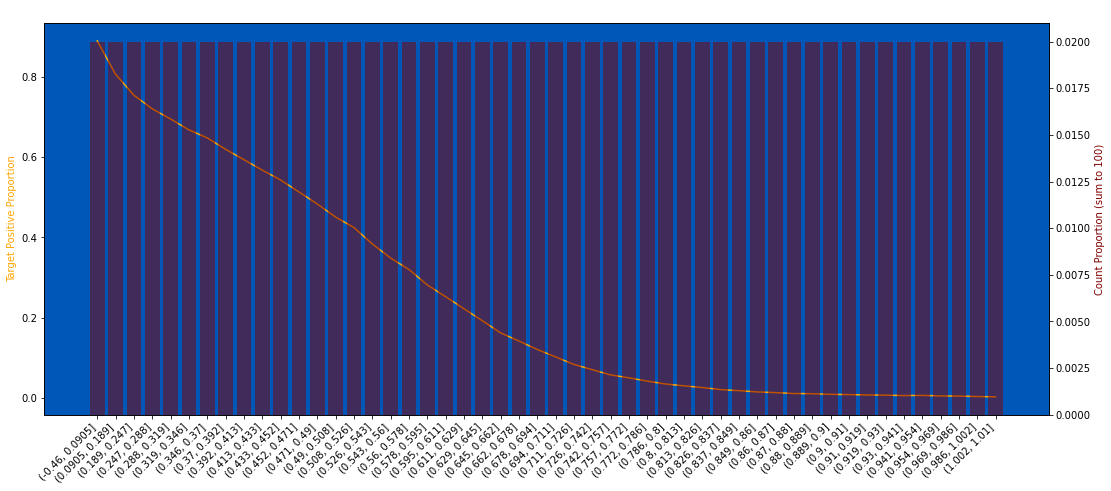

In [15]:
plot_target_check(train, "P_2", q=50, use_raw_bin=True)

In [16]:
%%time
df_list = round_dfs(df_list, col="P_2", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 264 ms, sys: 1.01 s, total: 1.27 s
Wall time: 2.19 s


45985 null count, 0.008 null proportion
0.2561 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


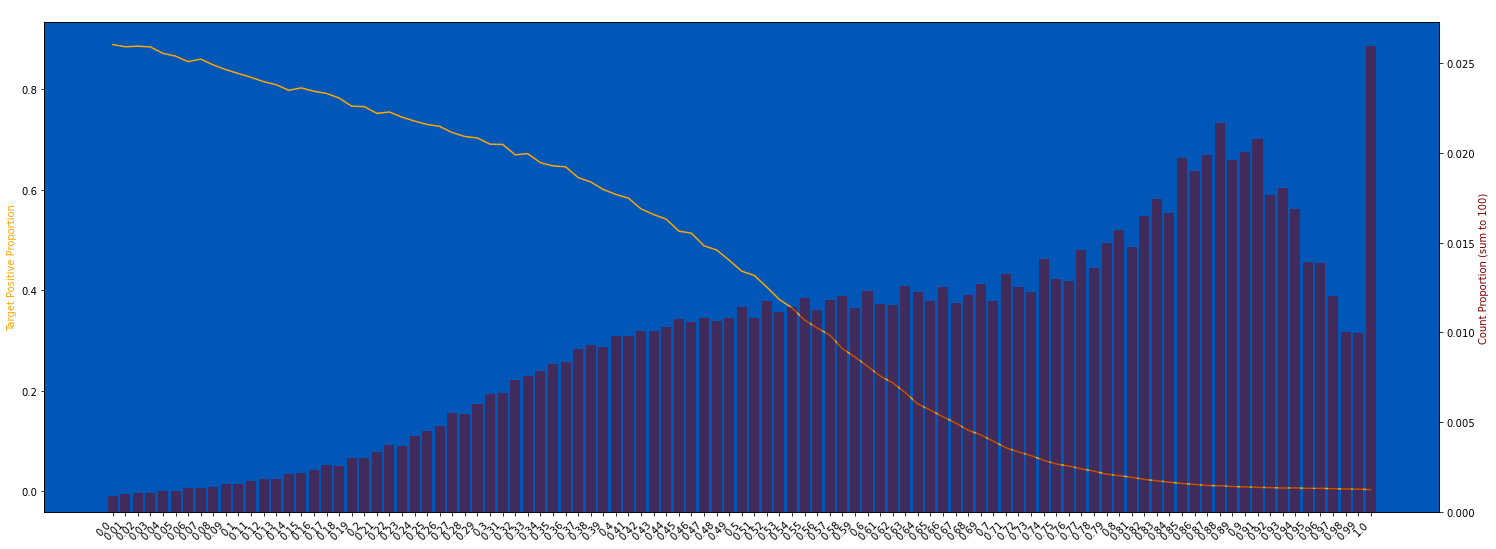

In [17]:
plot_target_check(train, "P_2", q=50, use_raw_bin=True, nunique_thr=150, strfy_x=True, figsize=(25, 10))

Bottom 1% and Top 1% are dropped from this chart


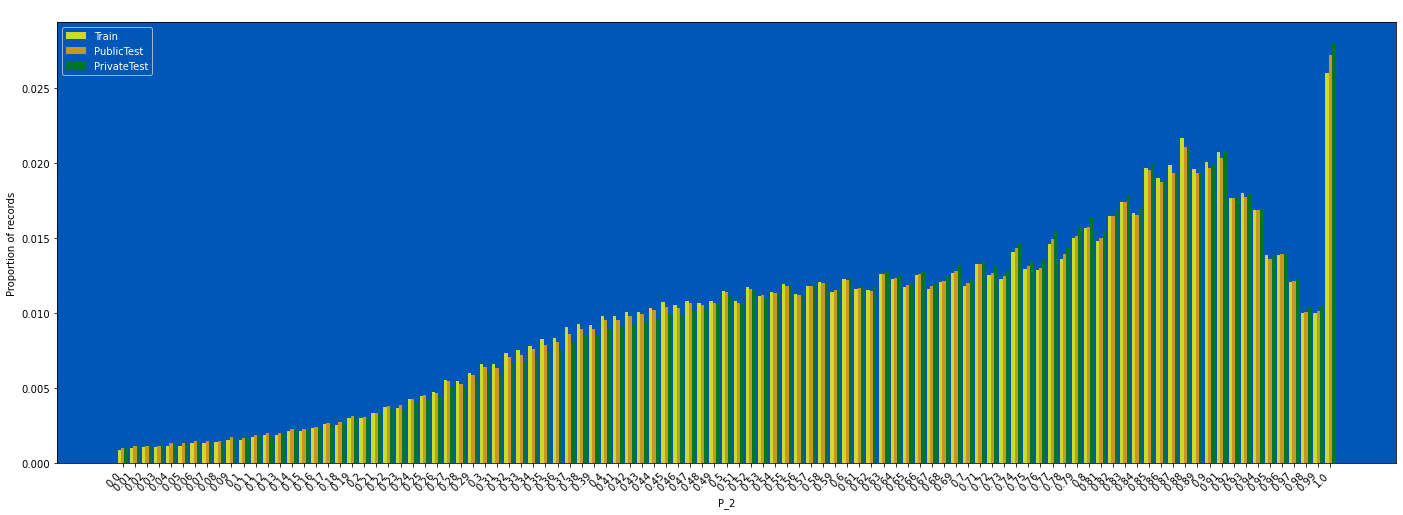

In [18]:
plot_train_test_distribution(df_list, "P_2", nunique_thr=150, figsize=(24, 9))

**Train Test Skew: Moderate**

In [19]:
# from scipy.stats import ks_2samp
# import numpy as np
# ks_2samp(train["P_2"].dropna(), test["P_2"].dropna())

In [20]:
# plot_sampled_time_series(train, labels, "P_2", 50)

### P_3

301492 null count, 0.055 null proportion
0.4439 of the targets have label = 1


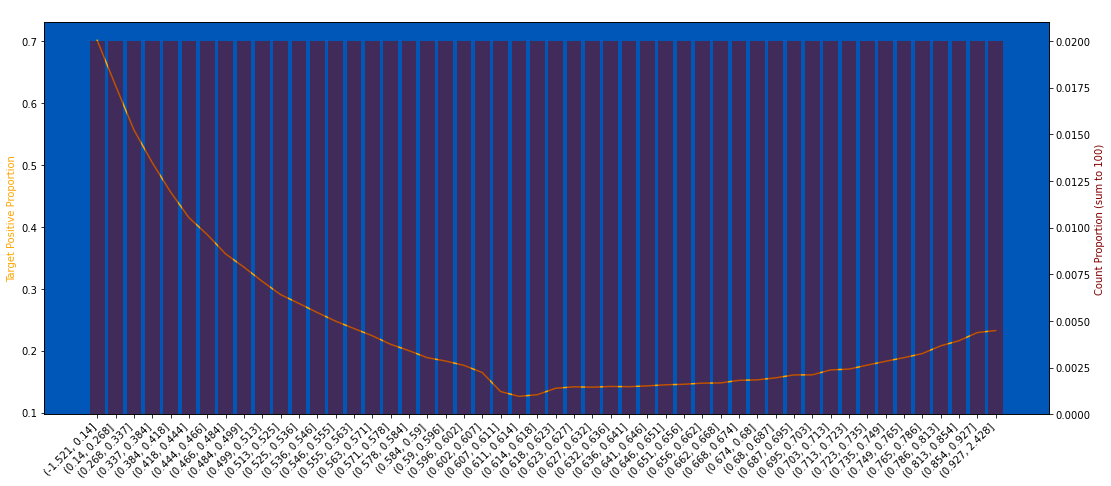

In [21]:
plot_target_check(train, "P_3", q=50, use_raw_bin=True)

In [22]:
%%time
df_list = round_dfs(df_list, col="P_3", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 264 ms, sys: 817 ms, total: 1.08 s
Wall time: 2.02 s


301492 null count, 0.055 null proportion
0.4439 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


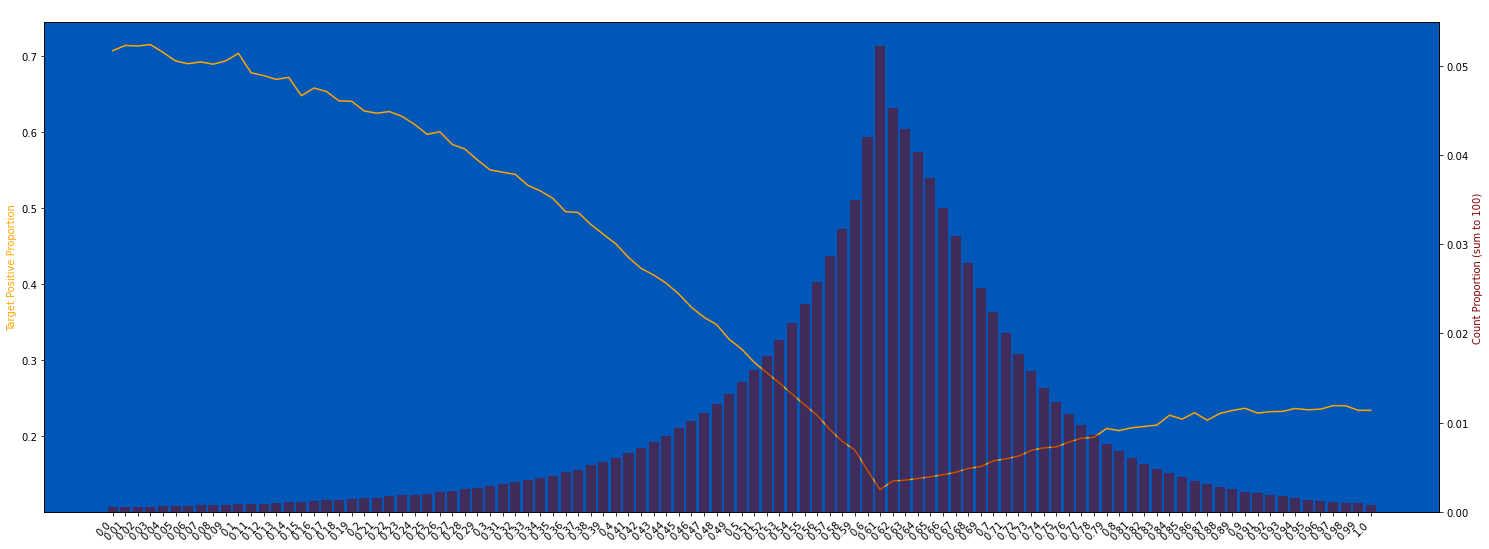

In [23]:
p3_summary = plot_target_check(train, "P_3", q=50, use_raw_bin=True, nunique_thr=340, strfy_x=True, figsize=(25, 10), 
                               drop_outlier=True, return_df=True)

**ToDo:**
- Try come out with a feature with monotone relationship and see

Bottom 1% and Top 1% are dropped from this chart


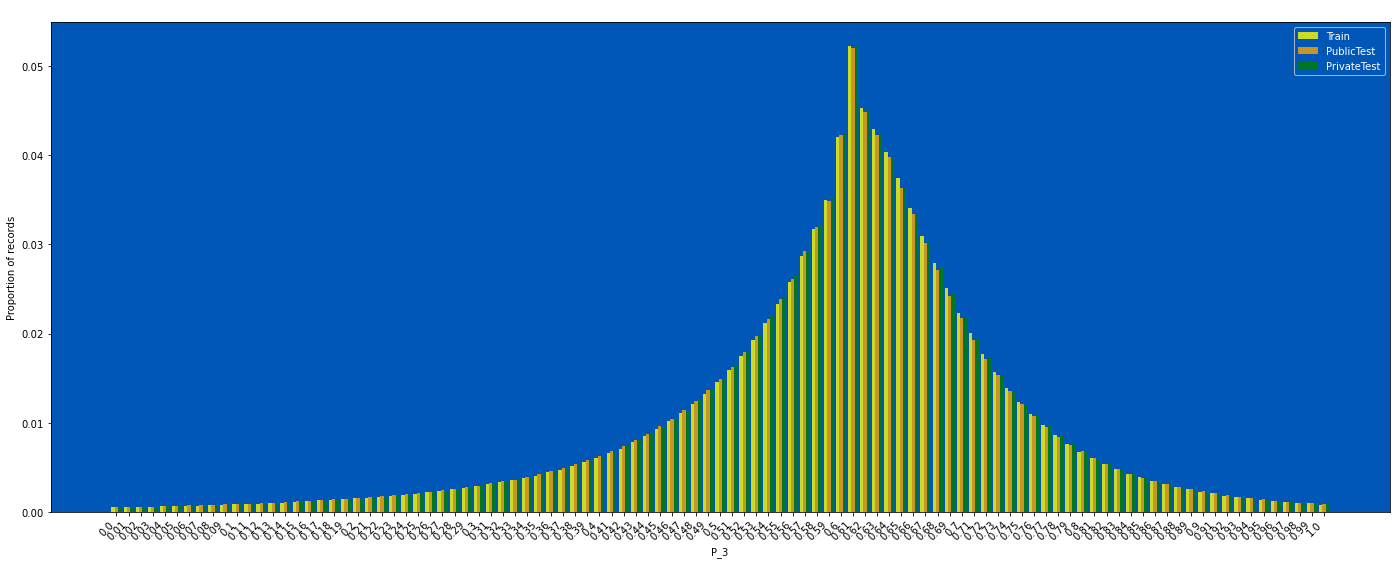

In [24]:
plot_train_test_distribution(df_list, "P_3", nunique_thr=340, figsize=(24, 10))

### P_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


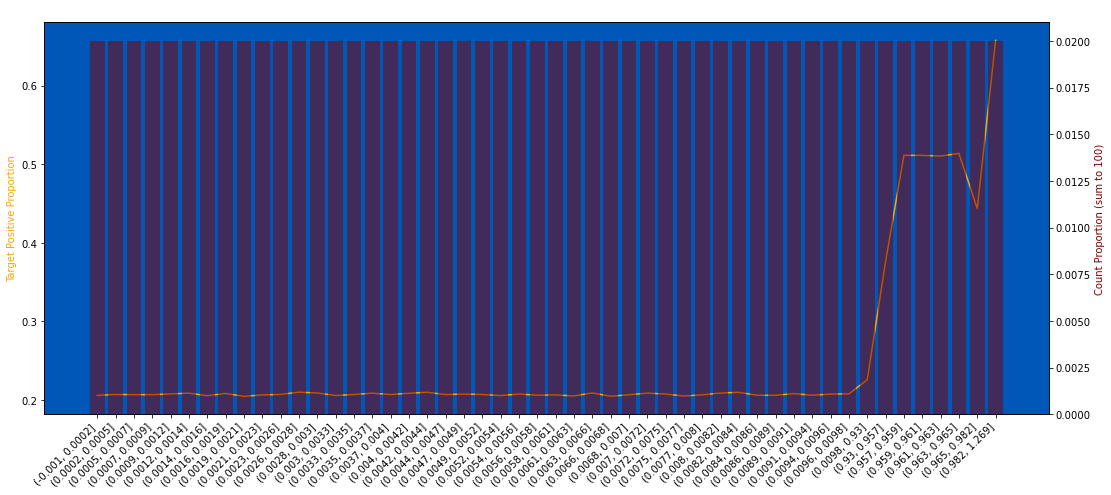

In [25]:
plot_target_check(train, "P_4", q=50, use_raw_bin=True)

In [26]:
%%time
df_list = round_dfs(df_list, col="P_4", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 257 ms, sys: 845 ms, total: 1.1 s
Wall time: 2.02 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


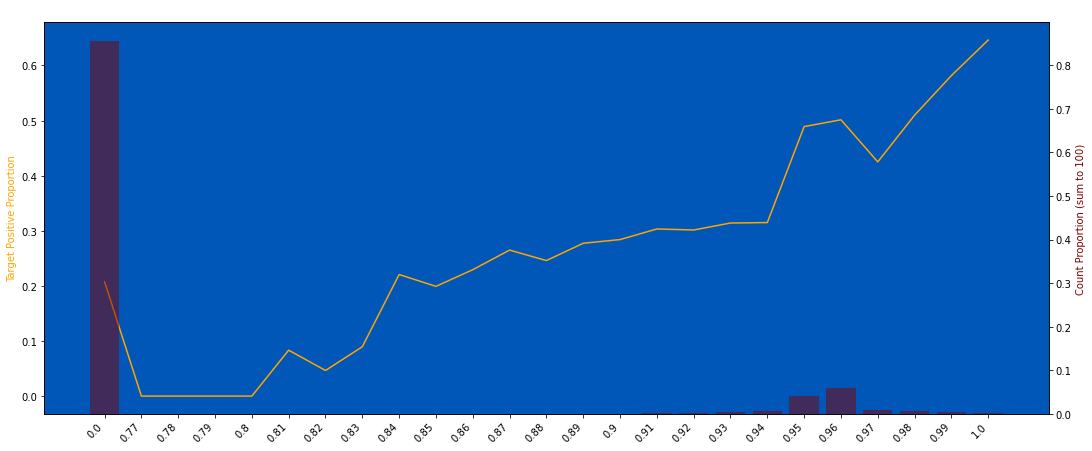

In [27]:
plot_target_check(train, "P_4", q=50, use_raw_bin=True, strfy_x=True)

**Comments:**
- P_4 in (0, 0.01) should be NaN, because it has different default trend + extremely low values (outlier)
- Also, original P_4 has no missing values

In [28]:
%%time
df_list = fill_nans(df_list, col="P_4", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 348 ms, sys: 1.45 s, total: 1.8 s
Wall time: 359 ms


4732506 null count, 0.856 null proportion
0.2073 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


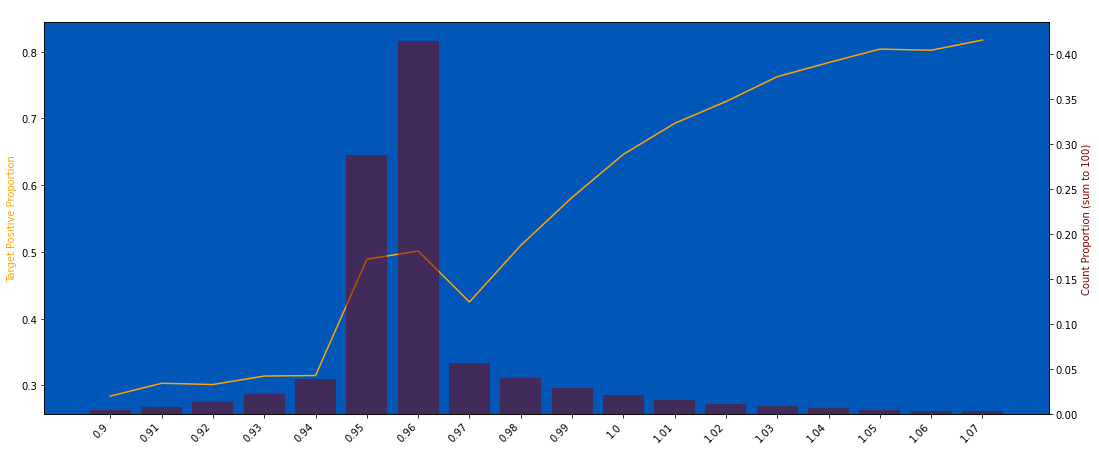

In [29]:
plot_target_check(train, "P_4", q=50, use_raw_bin=True, strfy_x=True)

**ToDo:**
- Identify the subset of P_4 in (0.95, 0.96) to fill with other values, to fix
  - The spike in default trend & distribution bell curve

Bottom 1% and Top 1% are dropped from this chart


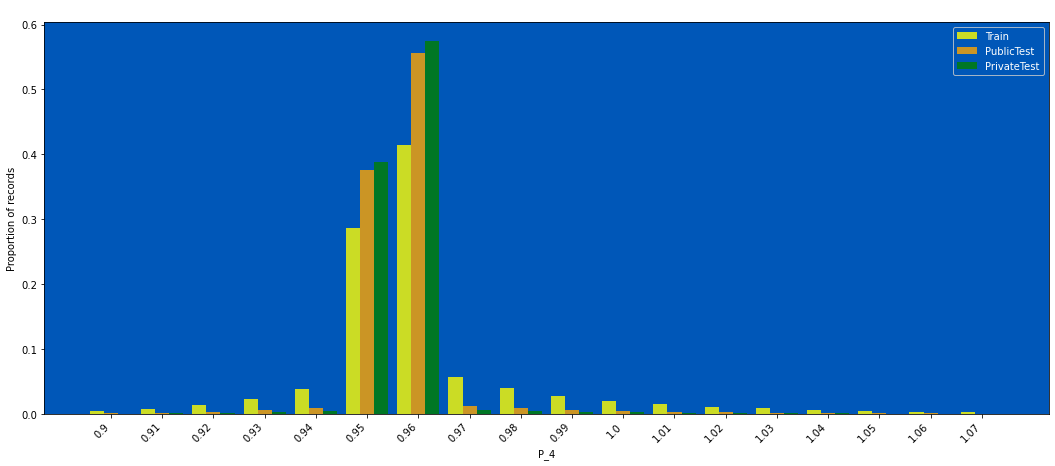

In [30]:
plot_train_test_distribution(df_list, "P_4")

**Train Test Skew: Heavy**

### S_3

1020544 null count, 0.184 null proportion
0.1064 of the targets have label = 1


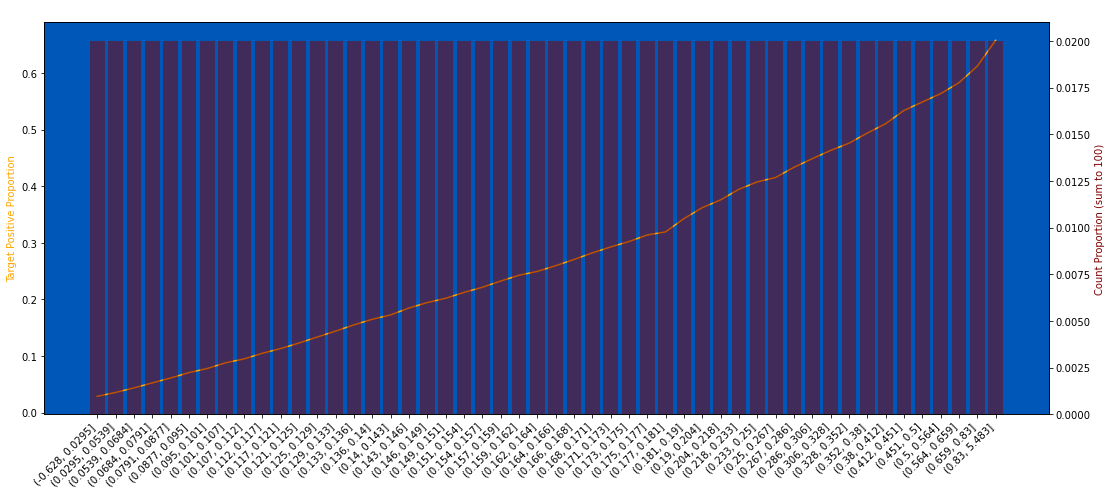

In [31]:
plot_target_check(train, "S_3", q=50, use_raw_bin=True)

In [32]:
%%time
df_list = round_dfs(df_list, col="S_3", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 303 ms, sys: 994 ms, total: 1.3 s
Wall time: 2.3 s


1020544 null count, 0.184 null proportion
0.1064 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


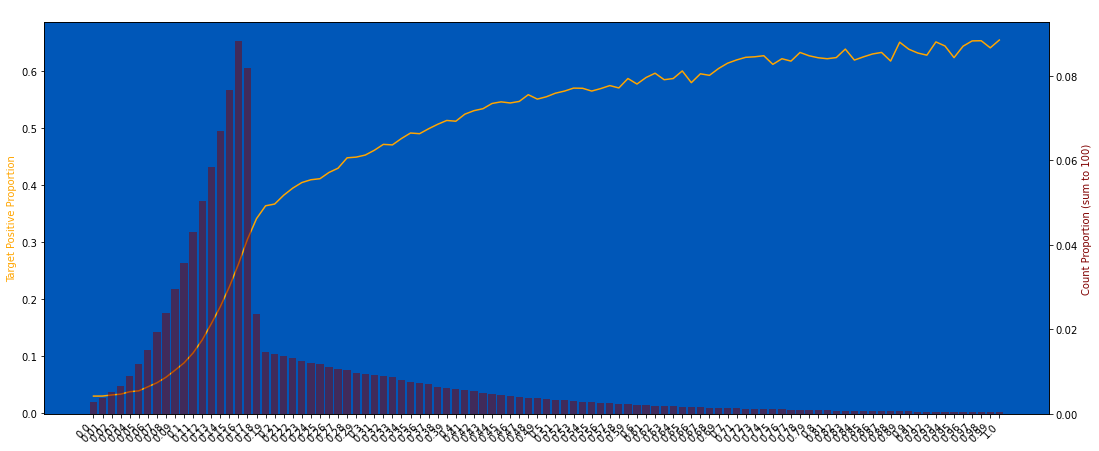

In [33]:
plot_target_check(train, "S_3", q=50, use_raw_bin=True, nunique_thr=700, strfy_x=True)

**ToDo:**
- Apply manual stacking / binning on right tail

In [34]:
# for df in df_list:
#     df["S_3"] = df["S_3"].parallel_apply(lambda x: manual_stack(x, start=0.18, stack_interval=0.04, denom=100))

In [35]:
# plot_target_check(train, "S_3", q=50, use_raw_bin=True, nunique_thr=700, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


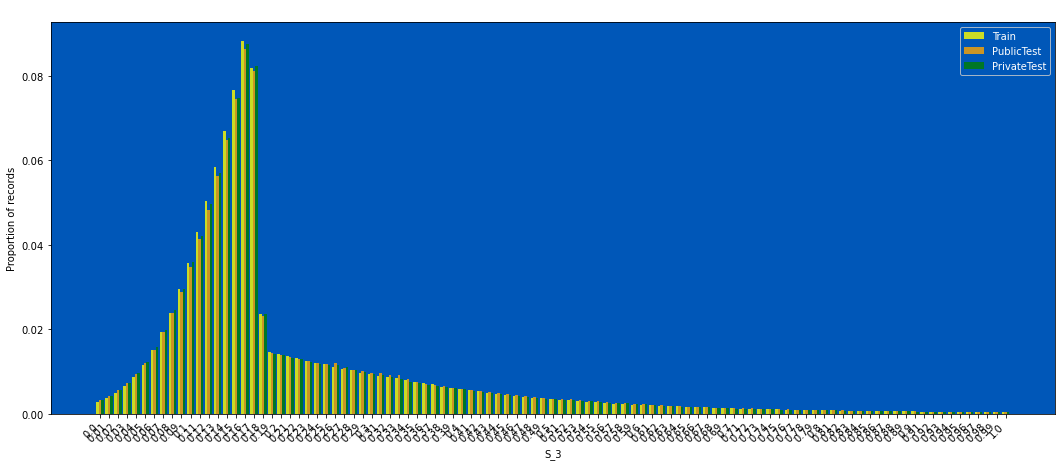

In [36]:
plot_train_test_distribution(df_list, "S_3", nunique_thr=500)

### S_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


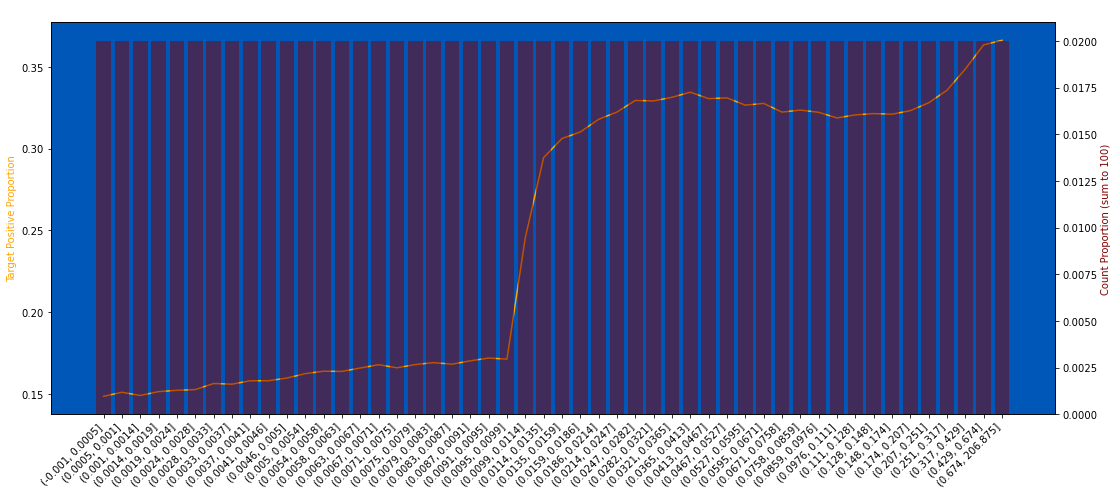

In [37]:
plot_target_check(train, "S_5", q=50, use_raw_bin=True)

In [38]:
%%time
df_list = round_dfs(df_list, col="S_5", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 275 ms, sys: 972 ms, total: 1.25 s
Wall time: 2.21 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


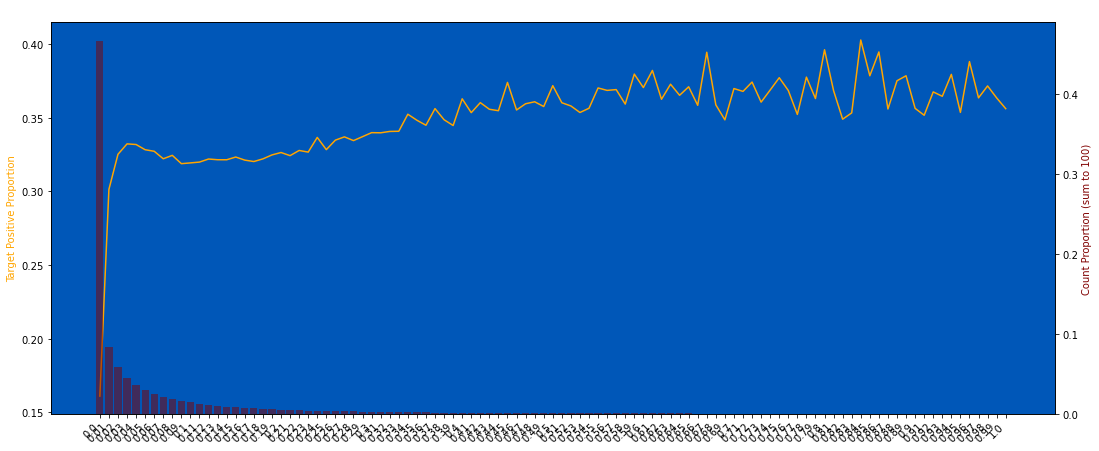

In [39]:
plot_target_check(train, "S_5", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

**ToDo:**
- Should apply manual stack / binning on the right tail

Bottom 1% and Top 1% are dropped from this chart


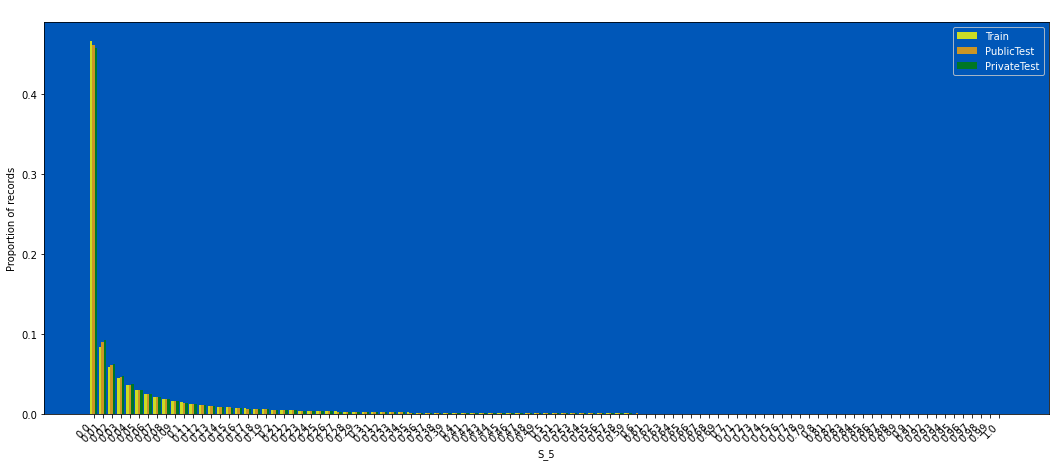

In [40]:
plot_train_test_distribution(df_list, "S_5", nunique_thr=5000)

### S_6 (Done)

0 null count, 0.000 null proportion
nan of the targets have label = 1


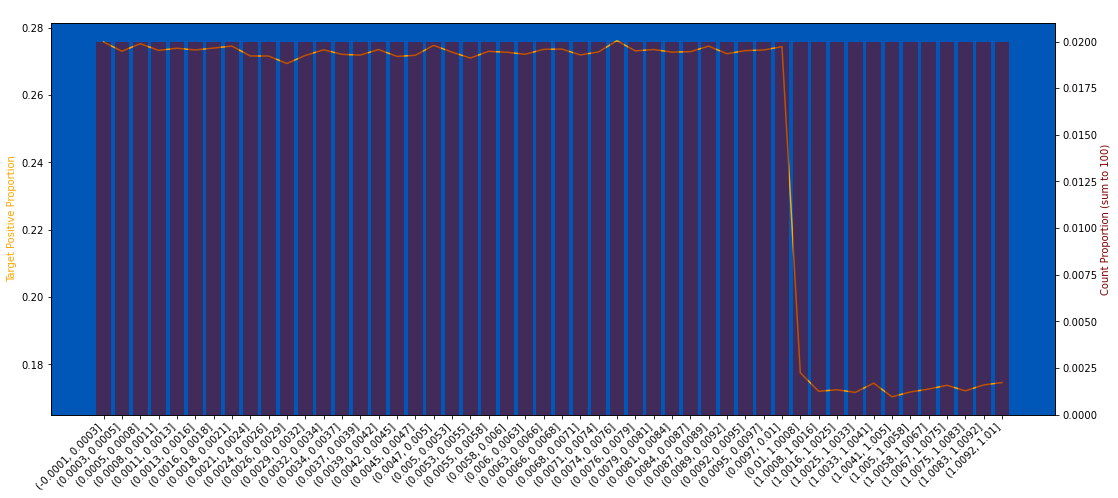

In [41]:
plot_target_check(train, "S_6", q=50, use_raw_bin=True, nunique_thr=5, strfy_x=True)

In [42]:
%%time
df_list = round_dfs(df_list, col="S_6", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 312 ms, sys: 1.11 s, total: 1.42 s
Wall time: 2.42 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


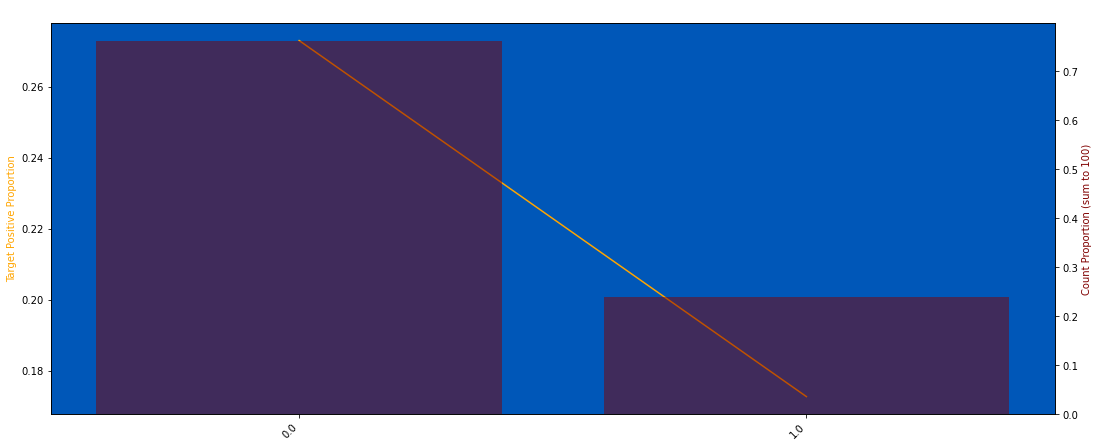

In [43]:
plot_target_check(train, "S_6", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [44]:
for df in df_list:
    df["S_6"] = integerize(df["S_6"])

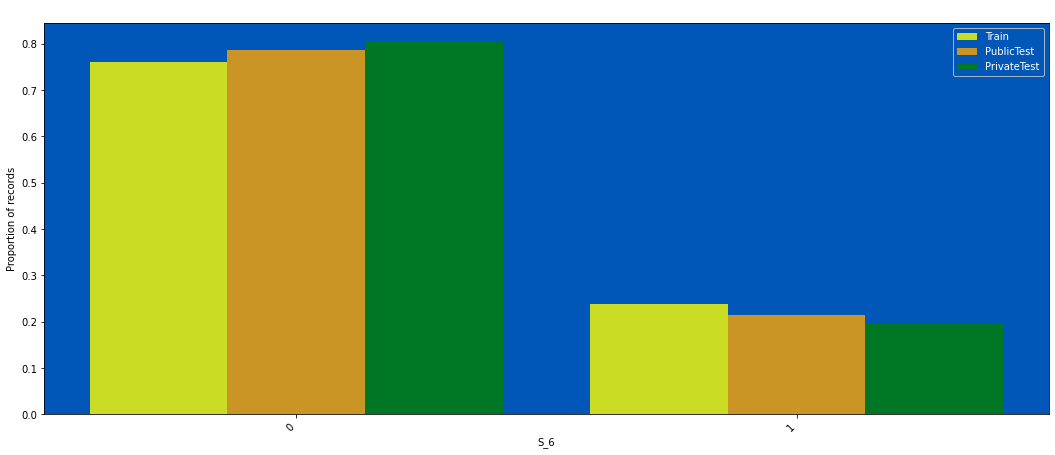

In [45]:
plot_train_test_distribution(df_list, "S_6", nunique_thr=50)

### S_7

1020544 null count, 0.184 null proportion
0.1064 of the targets have label = 1


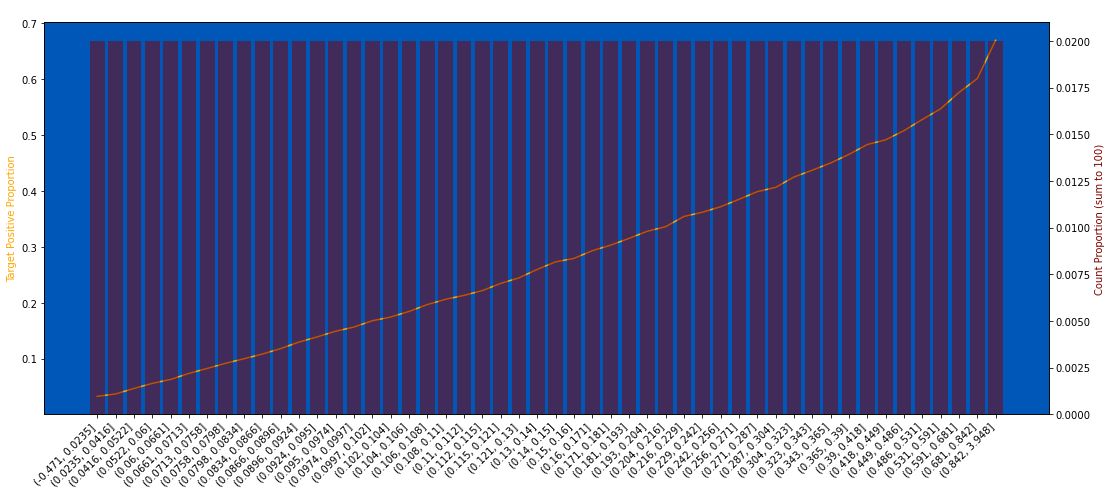

In [46]:
plot_target_check(train, "S_7", q=50, use_raw_bin=True)

In [47]:
%%time
df_list = round_dfs(df_list, col="S_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 1.04 s, total: 1.31 s
Wall time: 2.3 s


1020544 null count, 0.184 null proportion
0.1064 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


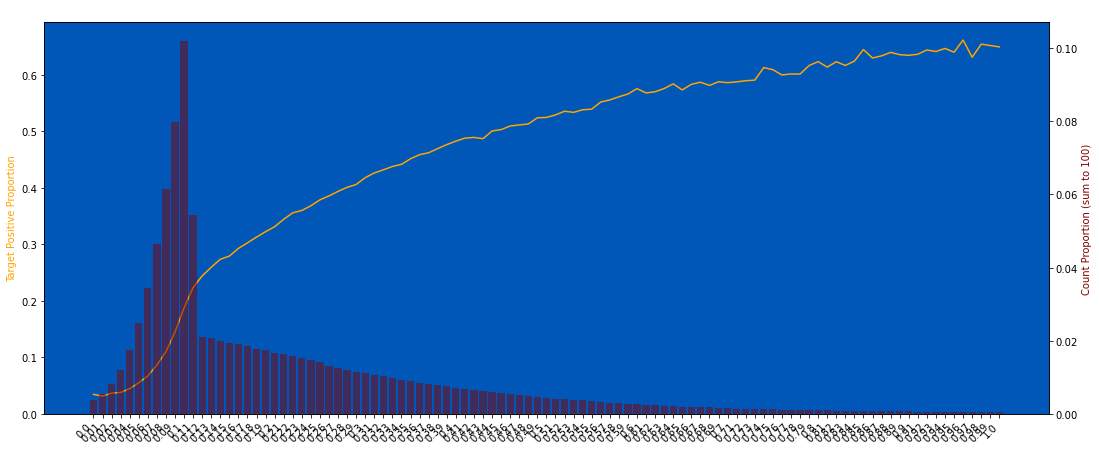

In [48]:
plot_target_check(train, "S_7", q=50, use_raw_bin=True, nunique_thr=360, strfy_x=True)

**ToDo:**
- Apply manual stacking / binning on right tail

In [49]:
# for df in df_list:
#     df["S_7"] = df["S_7"].parallel_apply(lambda x: manual_stack(x, start=0.11, stack_interval=0.06, denom=100))

In [50]:
# plot_target_check(train, "S_7", q=50, use_raw_bin=True, nunique_thr=360, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


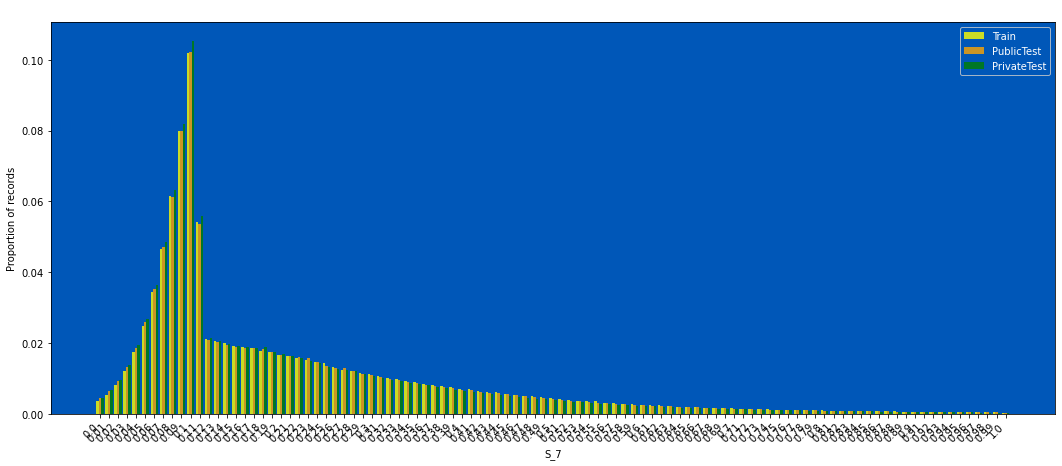

In [51]:
plot_train_test_distribution(df_list, "S_7", nunique_thr=5000)

### S_8

0 null count, 0.000 null proportion
nan of the targets have label = 1


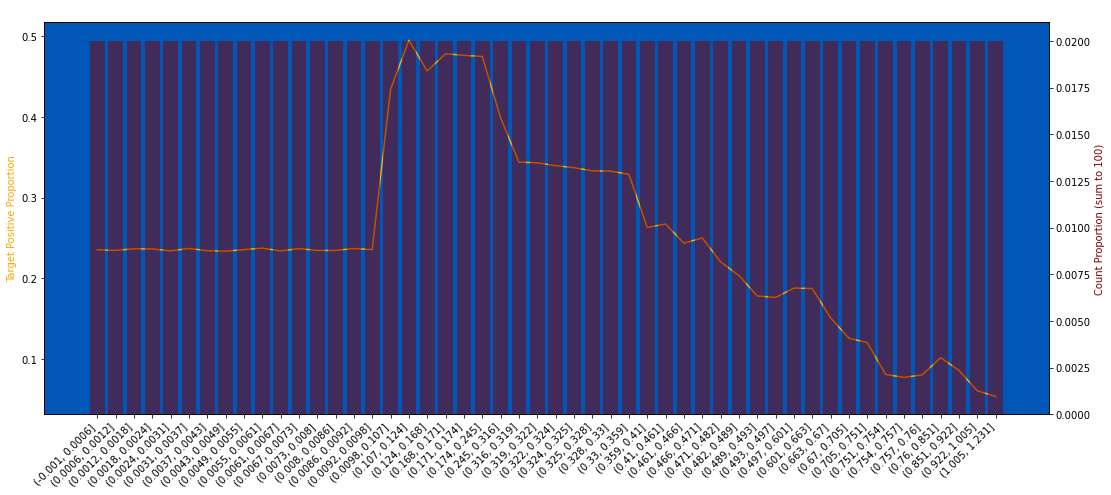

In [52]:
plot_target_check(train, "S_8", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [53]:
%%time
df_list = round_dfs(df_list, col="S_8", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 239 ms, sys: 952 ms, total: 1.19 s
Wall time: 2.11 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


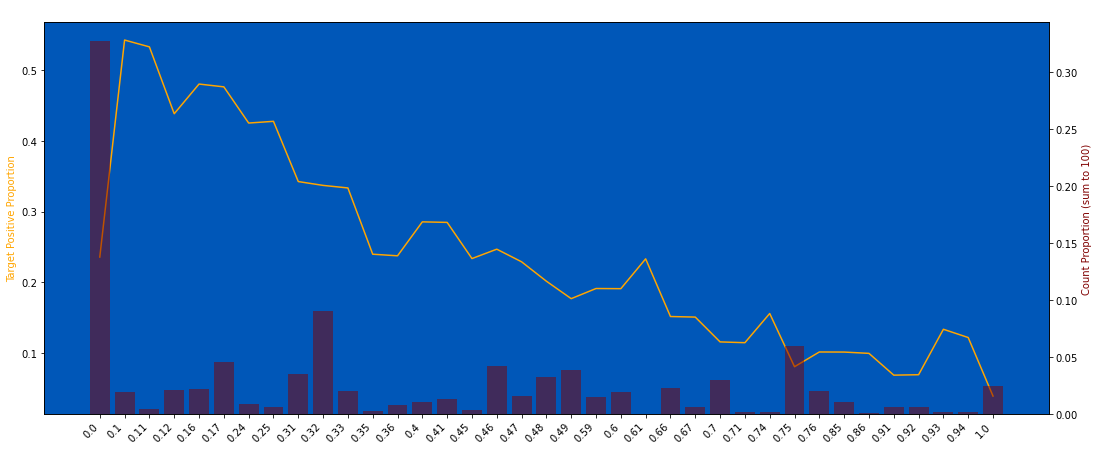

In [54]:
plot_target_check(train, "S_8", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

**Comments**
- S_8 in (0, 0.01) is likely to be NaN, because it violates the default rate downward trend & its average default rate is around 25%
- Also, original S_8 has no null values

In [55]:
%%time
df_list = fill_nans(df_list, col="S_8", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 367 ms, sys: 1.07 s, total: 1.43 s
Wall time: 363 ms


1808480 null count, 0.327 null proportion
0.2354 of the targets have label = 1


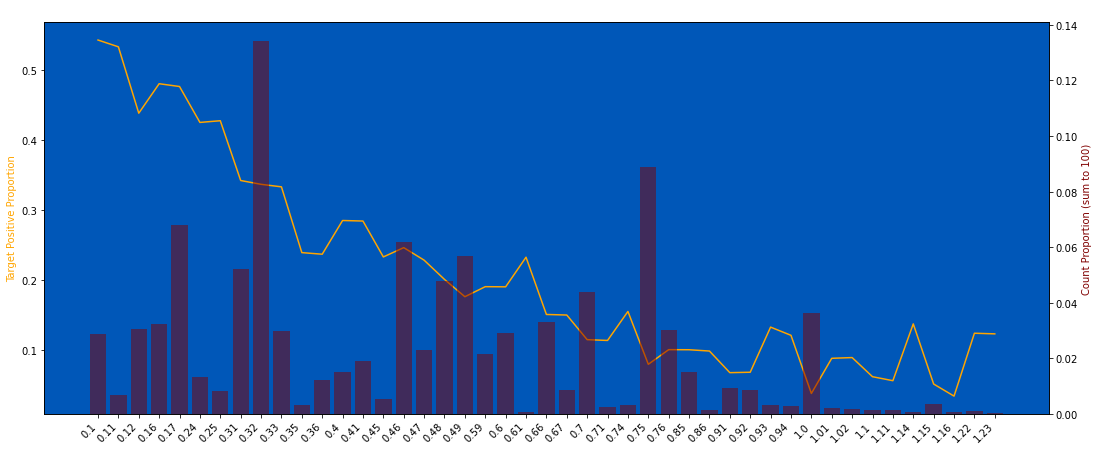

In [56]:
plot_target_check(train, "S_8", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

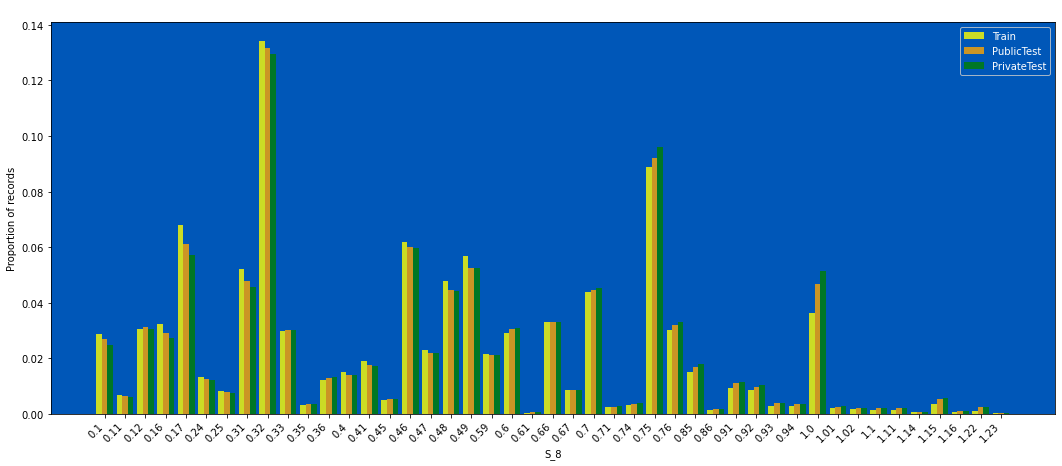

In [57]:
plot_train_test_distribution(df_list, "S_8", nunique_thr=500, without_drop_tail=True)

### S_9

2933643 null count, 0.530 null proportion
0.2719 of the targets have label = 1


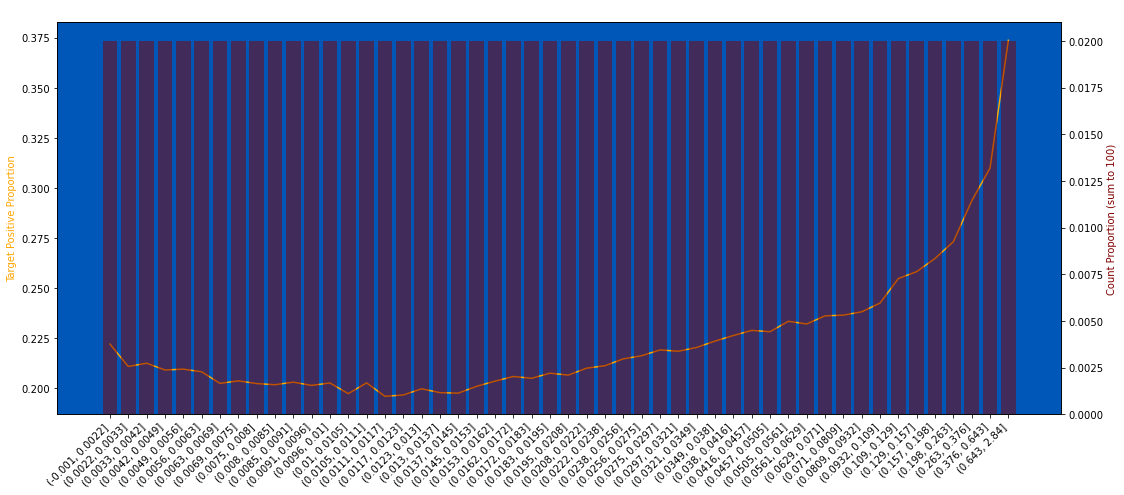

In [58]:
plot_target_check(train, "S_9", q=50, use_raw_bin=True)

In [59]:
%%time
df_list = round_dfs(df_list, col="S_9", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 272 ms, sys: 990 ms, total: 1.26 s
Wall time: 2.25 s


2933643 null count, 0.530 null proportion
0.2719 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


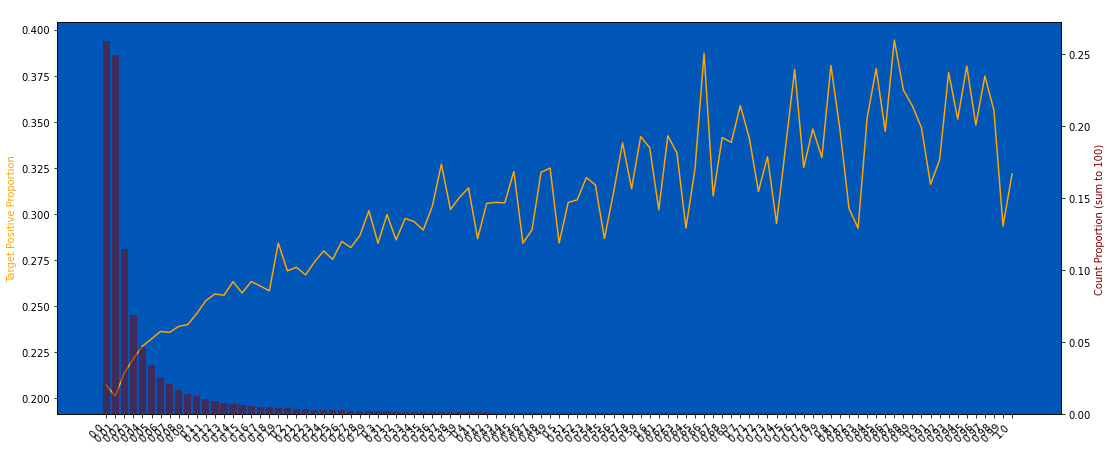

In [60]:
plot_target_check(train, "S_9", q=50, use_raw_bin=True, nunique_thr=300, strfy_x=True)

In [61]:
# for df in df_list:
#     df["S_9"] = df["S_9"].parallel_apply(lambda x: manual_stack(x, start=0, stack_interval=0.04, denom=100))

In [62]:
# plot_target_check(train, "S_9", q=50, use_raw_bin=True, nunique_thr=300, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


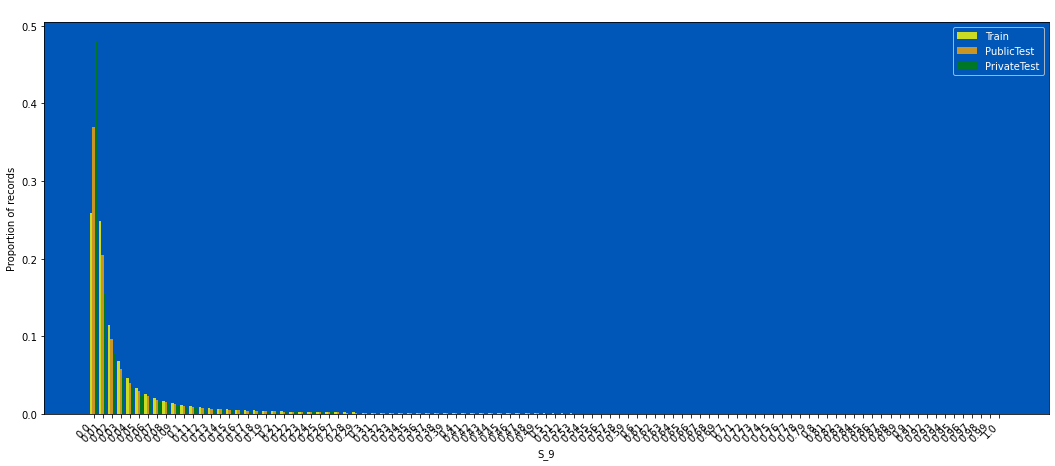

In [63]:
plot_train_test_distribution(df_list, "S_9", nunique_thr=300)

**Train Test Skew: Moderate**

### S_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


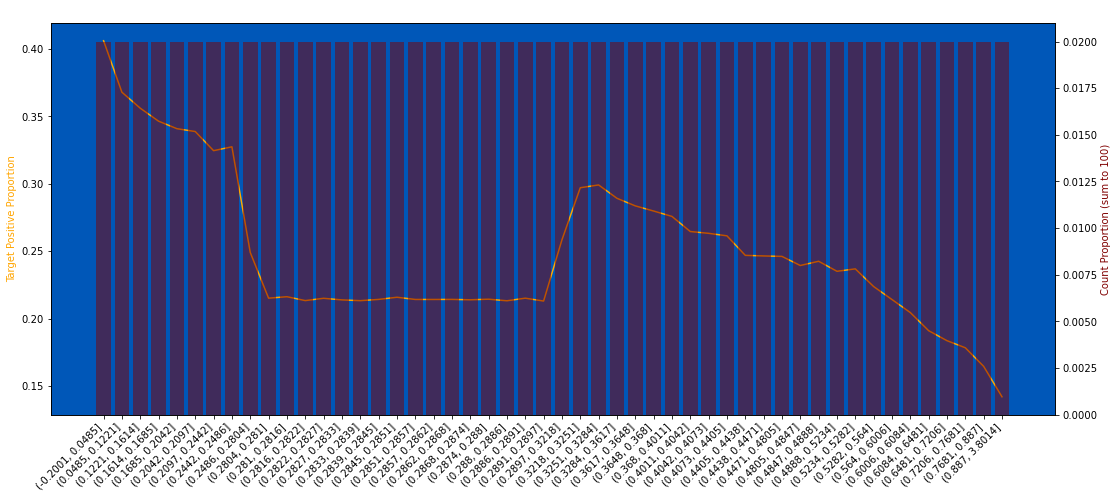

In [64]:
plot_target_check(train, "S_11", q=50, use_raw_bin=True)

In [65]:
df_list = round_dfs(df_list, col="S_11", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


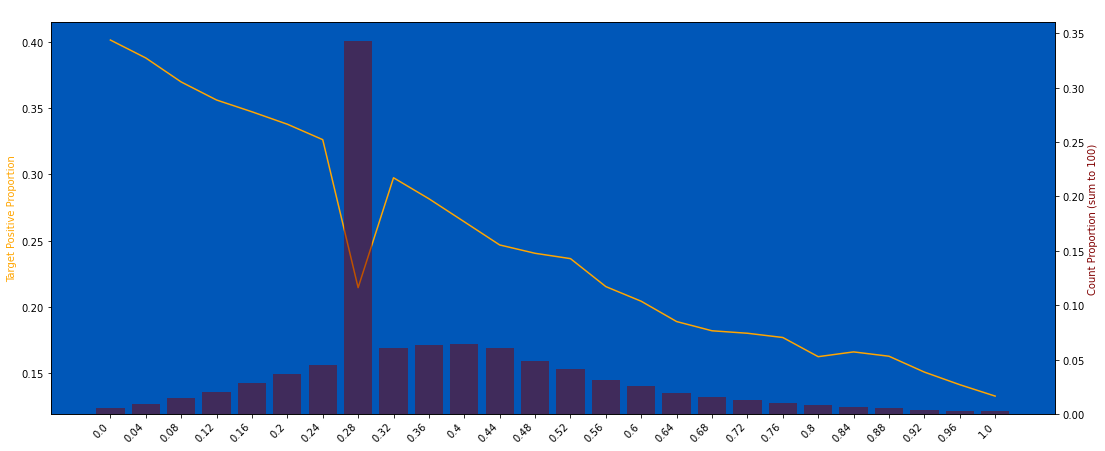

In [66]:
plot_target_check(train, "S_11", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [67]:
for df in df_list:
    df["S_11_"] = (df["S_11"] / 0.04).round(0)

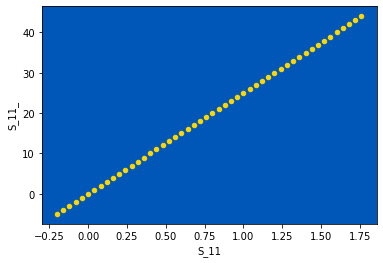

In [68]:
check_binning(train, "S_11", end=50)

In [69]:
for df in df_list:
    df["S_11"] = (df["S_11"] / 0.04).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


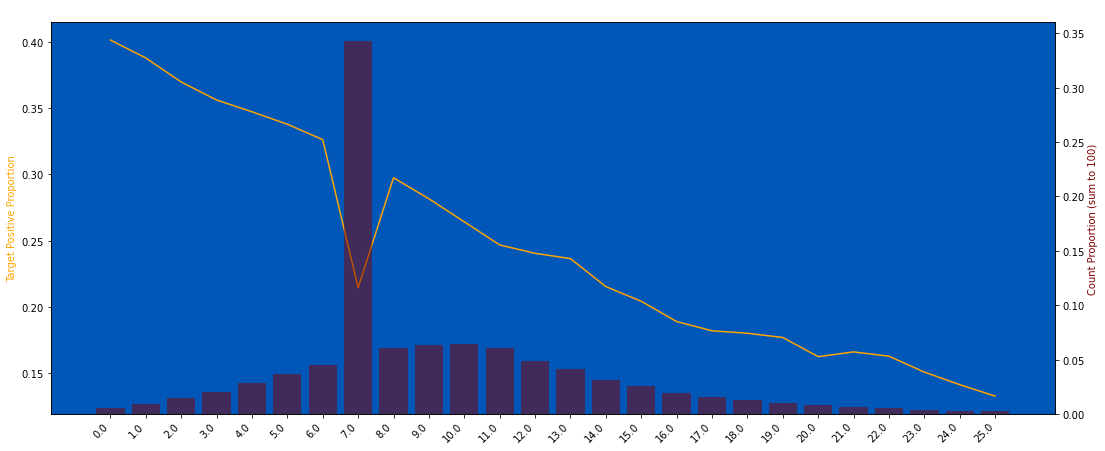

In [70]:
plot_target_check(train, "S_11", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


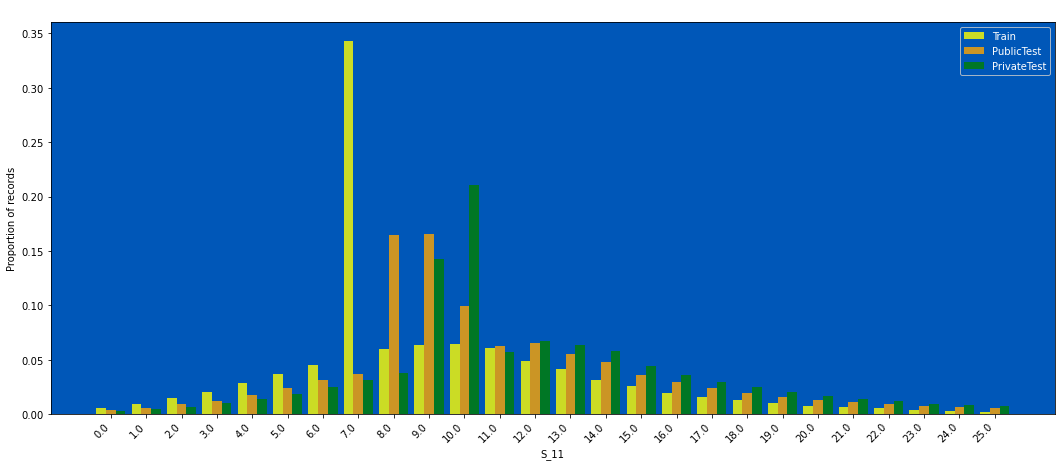

In [71]:
plot_train_test_distribution(df_list, "S_11", nunique_thr=50000)

**Train Test Skew: Heavy**

**ToDo:**
- Identify subset of 7 - 10 to be replace by other values to fix the train test skew & make the bell curve smoother
- If not able to do that, drop this column S_11

### S_12

0 null count, 0.000 null proportion
nan of the targets have label = 1


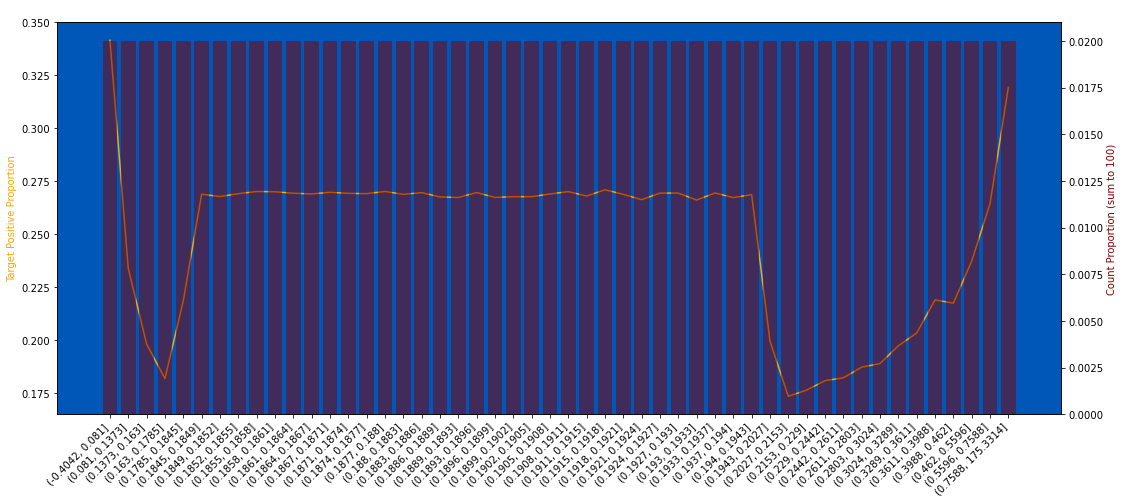

In [72]:
plot_target_check(train, "S_12", q=50, use_raw_bin=True)

In [73]:
%%time
df_list = round_dfs(df_list, col="S_12", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 969 ms, total: 1.23 s
Wall time: 2.14 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


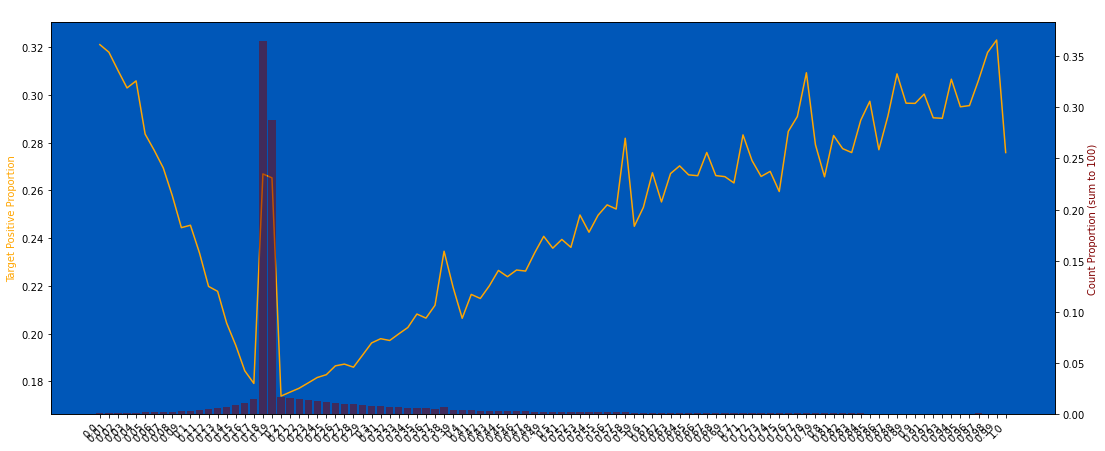

In [74]:
plot_target_check(train, "S_12", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

#### ToDo:
- Replace some of the 0.18 & 0.19 with NaN, need to find the appropriate way to filter the subset to be replace

Bottom 1% and Top 1% are dropped from this chart


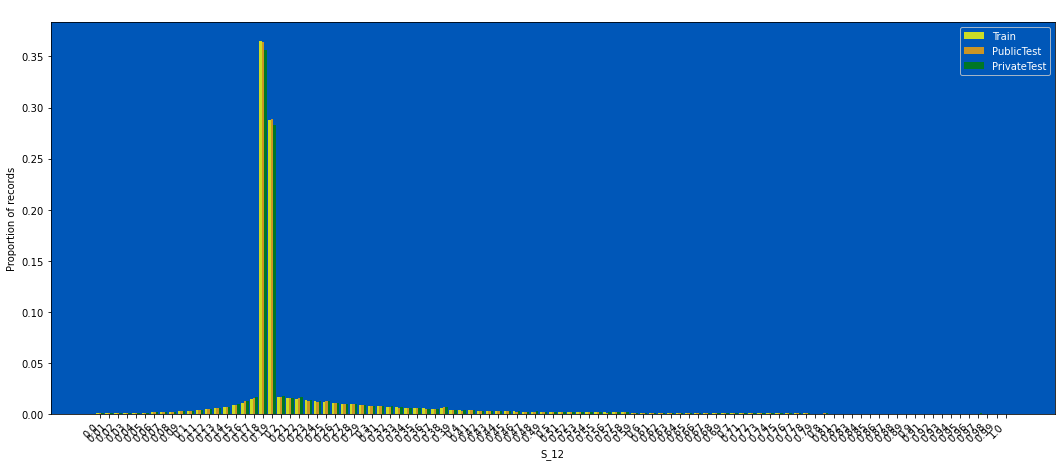

In [75]:
plot_train_test_distribution(df_list, "S_12", nunique_thr=50000)

**Train Test Skew: Mild**

### S_13

0 null count, 0.000 null proportion
nan of the targets have label = 1


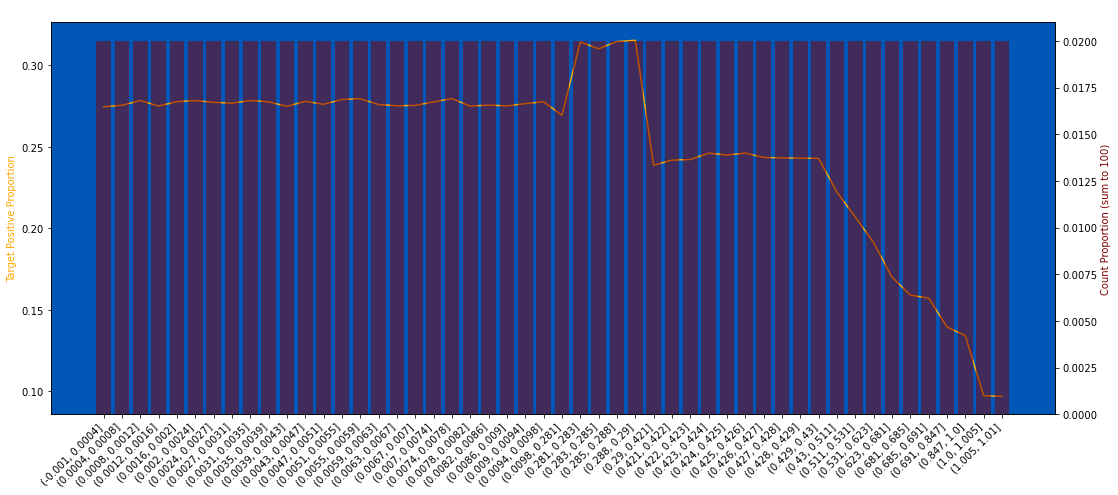

In [76]:
plot_target_check(train, "S_13", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True)

In [77]:
%%time
df_list = round_dfs(df_list, col="S_13", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 266 ms, sys: 1 s, total: 1.27 s
Wall time: 2.24 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


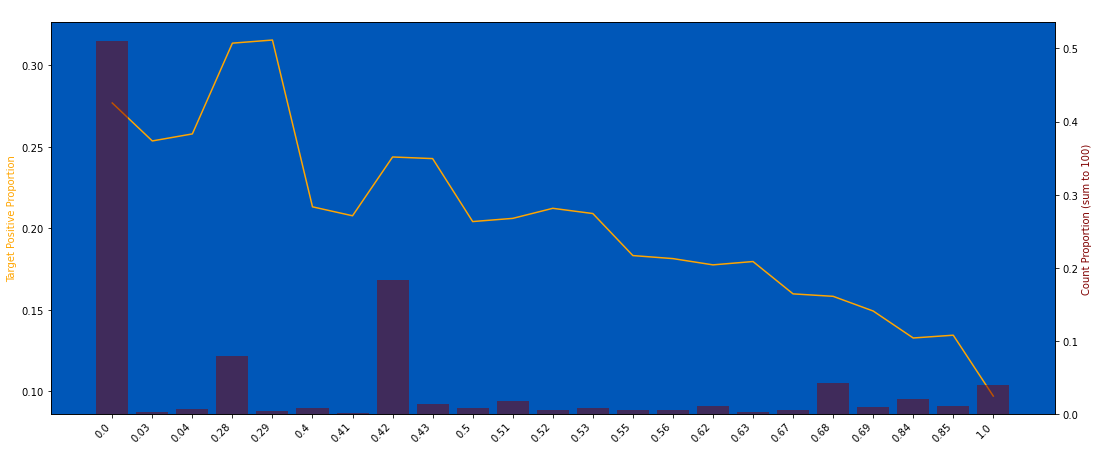

In [78]:
plot_target_check(train, "S_13", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [79]:
for df in df_list:
    df["S_13_"] = (df["S_13"] / 0.05)

In [80]:
%%time
df_list = round_dfs(df_list, col="S_13_", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 154 ms, sys: 819 ms, total: 974 ms
Wall time: 1.42 s


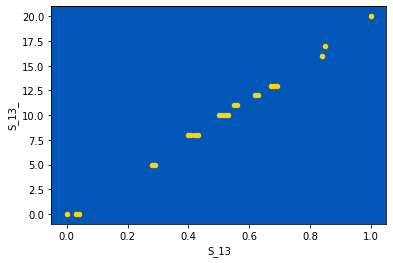

In [81]:
check_binning(train, "S_13", end=200)

In [82]:
for df in df_list:
    df["S_13"] = (df["S_13"] / 0.05)

In [83]:
%%time
df_list = round_dfs(df_list, col="S_13", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 135 ms, sys: 727 ms, total: 862 ms
Wall time: 1.44 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


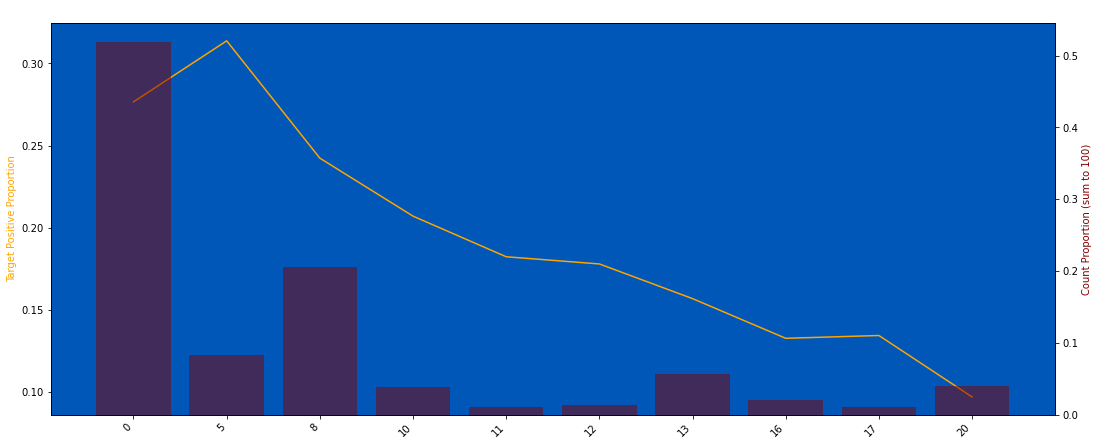

In [84]:
plot_target_check(train, "S_13", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [85]:
# for df in df_list:
#     df["S_13_"] = df["S_13"].parallel_apply(lambda x: manual_stack(x, start=0, stack_interval=0.07, denom=10))

Bottom 1% and Top 1% are dropped from this chart


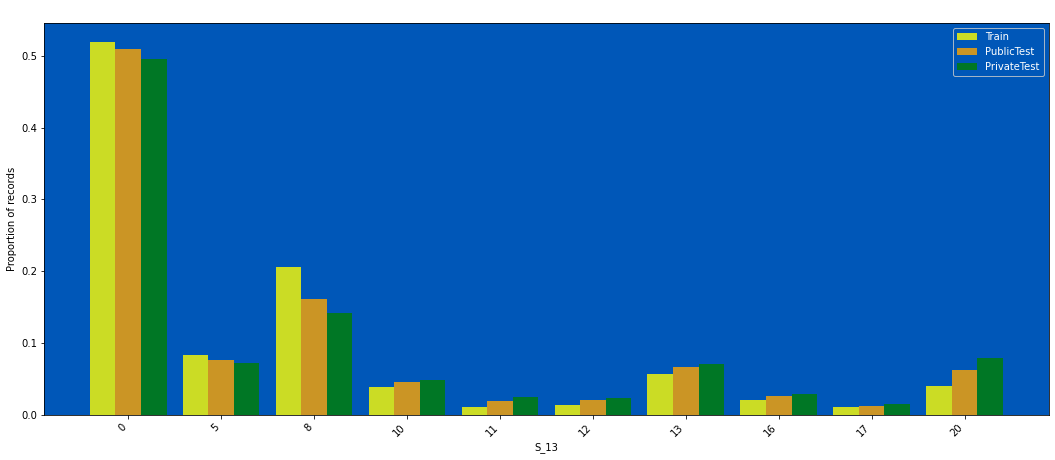

In [86]:
plot_train_test_distribution(df_list, "S_13", nunique_thr=50000)

### S_15

0 null count, 0.000 null proportion
nan of the targets have label = 1


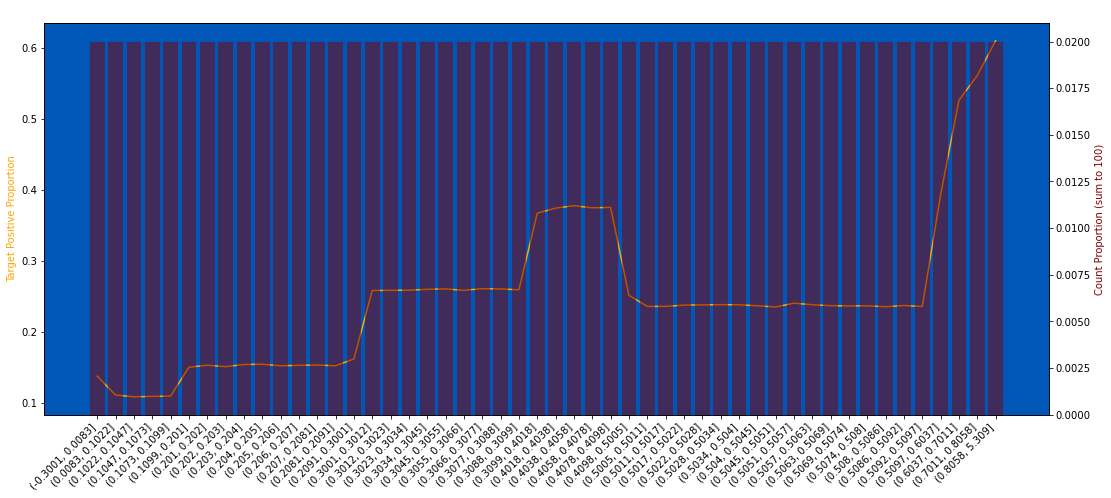

In [87]:
plot_target_check(train, "S_15", q=50, use_raw_bin=True)

In [88]:
%%time
df_list = round_dfs(df_list, col="S_15", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 260 ms, sys: 1.02 s, total: 1.28 s
Wall time: 2.22 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


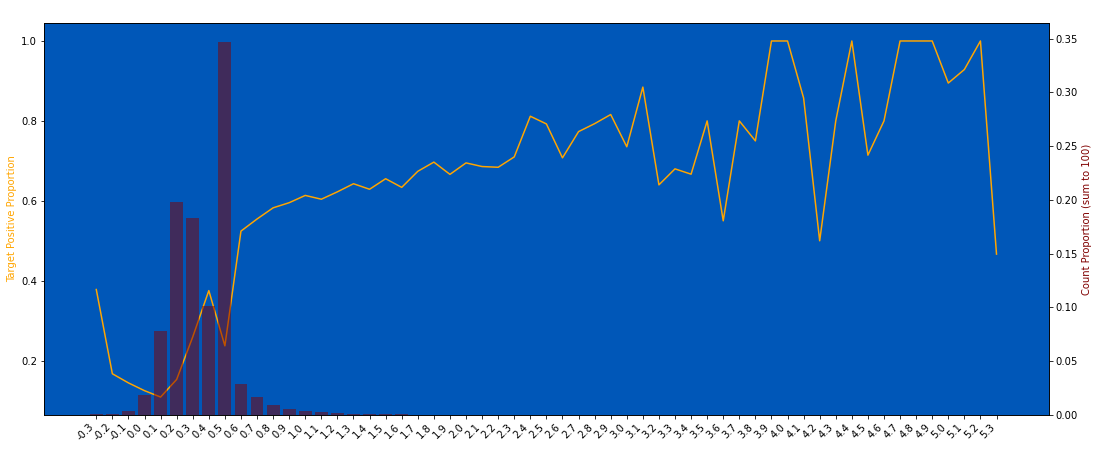

In [89]:
plot_target_check(train, "S_15", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

**Comments:**
- Some of the 0.5 - 0.51 are suspiciously null value, reason => violate bell curve & spike in default trend (lower default rate)

In [90]:
for df in df_list:
    df["S_15_"] = df["S_15"].copy()
    df.loc[df["S_15"].between(0.5, 0.51), "S_15_"] = np.nan

In [91]:
for col in train.columns[2:]:
    if col == "temp":
        continue
    corrcoef = train[["S_15_", col]].dropna().corr().iloc[0, 1]
    if abs(corrcoef) >= 0.3:
        print(col, corrcoef)

P_2 -0.3199988424449248
S_3 0.514010693754004
S_7 0.466115092312658
S_8 -0.7195495553333447
S_15 1.0
S_15_ 1.0


**Comments:**
- S_8 has the highest (absolute) correlation with S_15, use this information to cross validate the 0.5 - 0.51

In [92]:
train["S_8"].describe()

count   3,722,971.0000
mean            0.4793
std             0.2477
min             0.1000
25%             0.3200
50%             0.4600
75%             0.7000
max             1.2300
Name: S_8, dtype: float64

In [93]:
train.loc[train["S_8"].isnull(), "S_15"].describe()

count   1,808,480.0000
mean            0.5212
std             0.1140
min             0.5000
25%             0.5000
50%             0.5000
75%             0.5000
max             5.3000
Name: S_15, dtype: float64

In [94]:
np.percentile(train.loc[train["S_8"].isnull(), "S_15"].dropna(), 0)

0.5

In [95]:
np.percentile(train.loc[train["S_8"].isnull(), "S_15"].dropna(), 93)

0.5

**Comments:**
- When S_8 is null, S_15 is likely to be 0.5 (about 93% of them)
- Replace those S_15 (0.5 - 0.51) with NaN

In [96]:
for df in df_list:
    df.loc[(df["S_15"].between(0.5, 0.51)) & (df["S_8"].isnull()), "S_15"] = np.nan

In [97]:
df_list = round_dfs(df_list, col="S_15", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


1689649 null count, 0.305 null proportion
0.2090 of the targets have label = 1


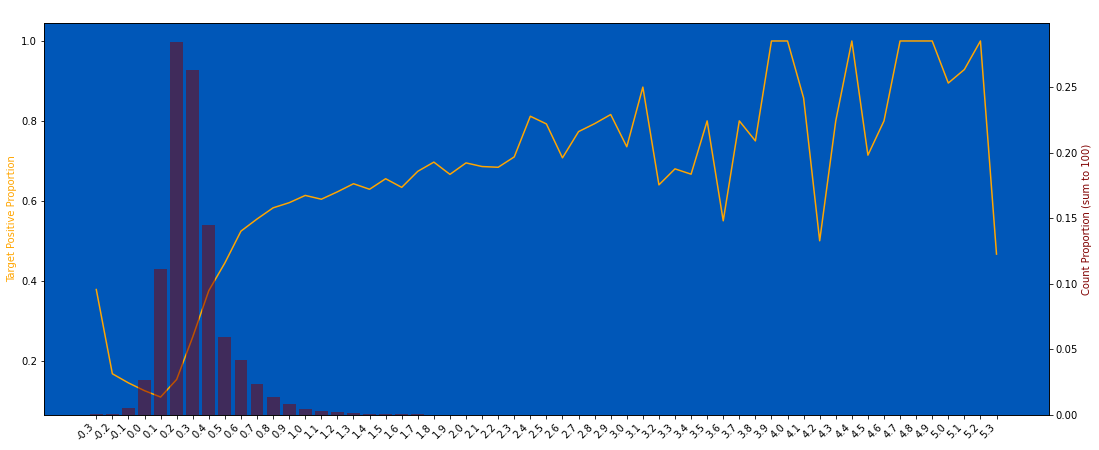

In [98]:
plot_target_check(train, "S_15", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [99]:
for df in df_list:
    df.loc[(df["S_15"].between(0.6, 0.61)) & (df["S_8"].isnull()), "S_15"] = np.nan

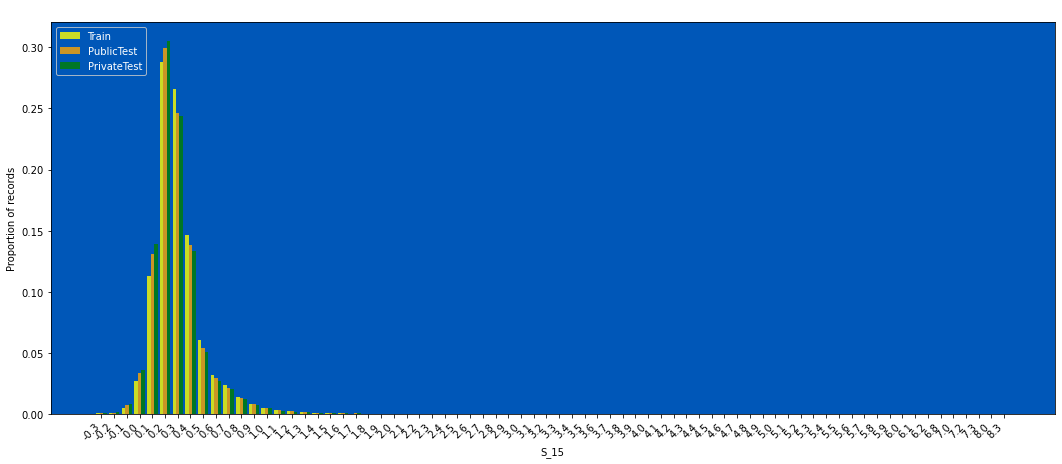

In [100]:
plot_train_test_distribution(df_list, "S_15", nunique_thr=500, without_drop_tail=True)

### S_16

0 null count, 0.000 null proportion
nan of the targets have label = 1


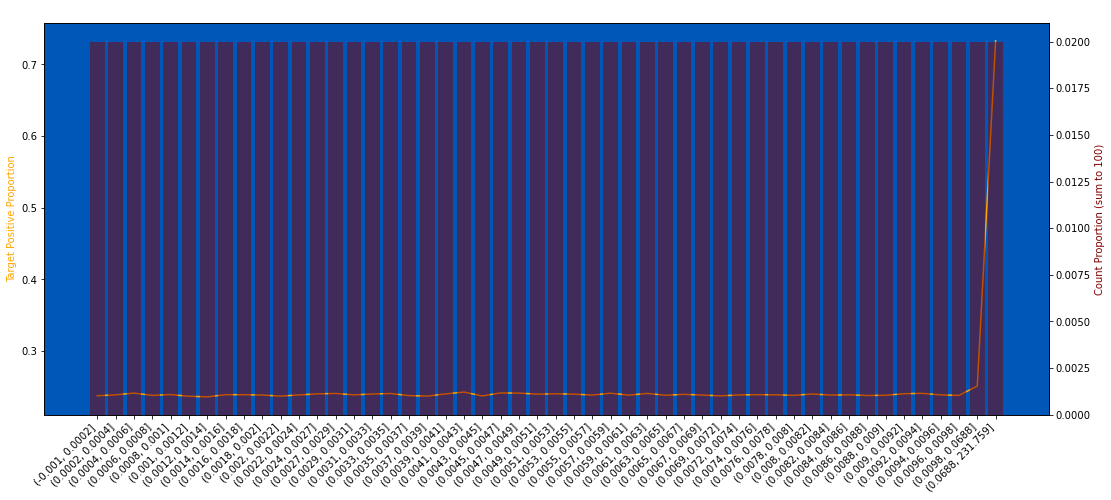

In [101]:
plot_target_check(train, "S_16", q=50, use_raw_bin=True)

In [102]:
%%time
df_list = round_dfs(df_list, col="S_16", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 980 ms, total: 1.24 s
Wall time: 2.21 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


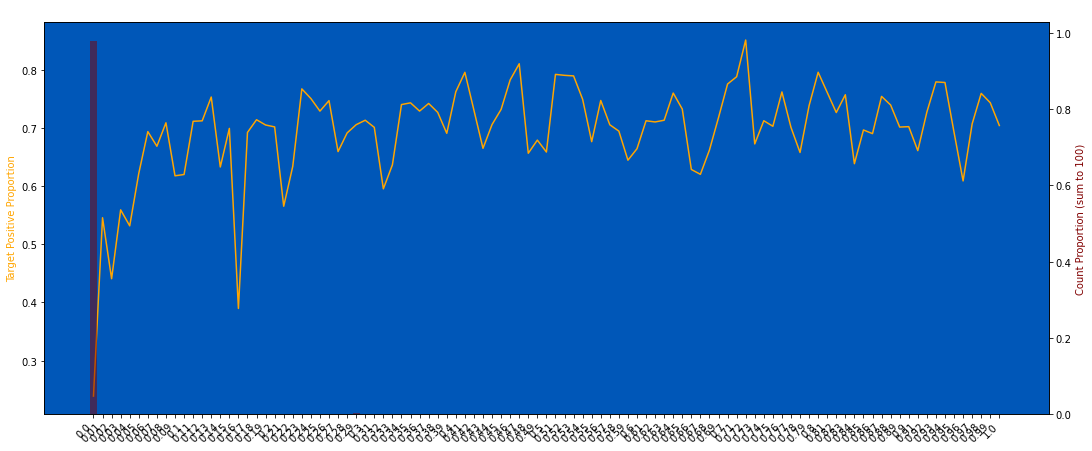

In [103]:
plot_target_check(train, "S_16", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


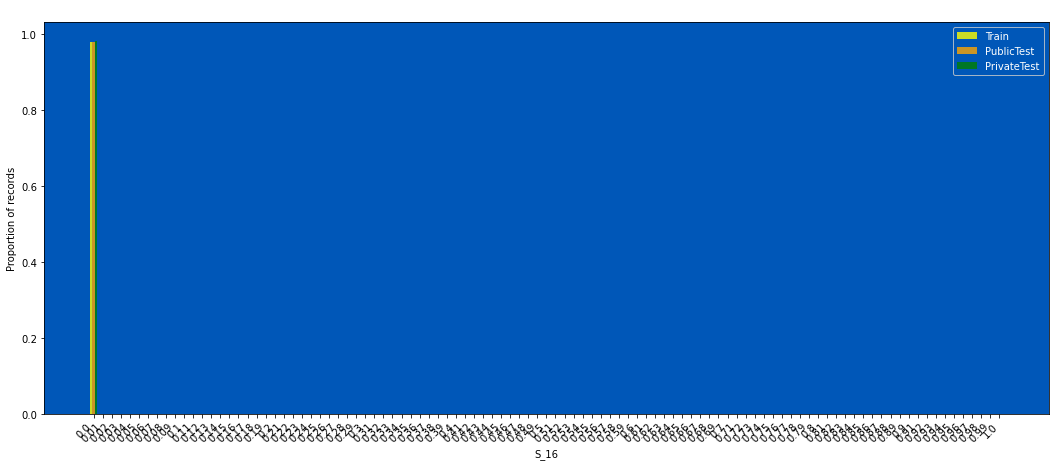

In [104]:
plot_train_test_distribution(df_list, "S_16", nunique_thr=5000)

**ToDo:**
- Replace some zeros as NaN

### S_17

0 null count, 0.000 null proportion
nan of the targets have label = 1


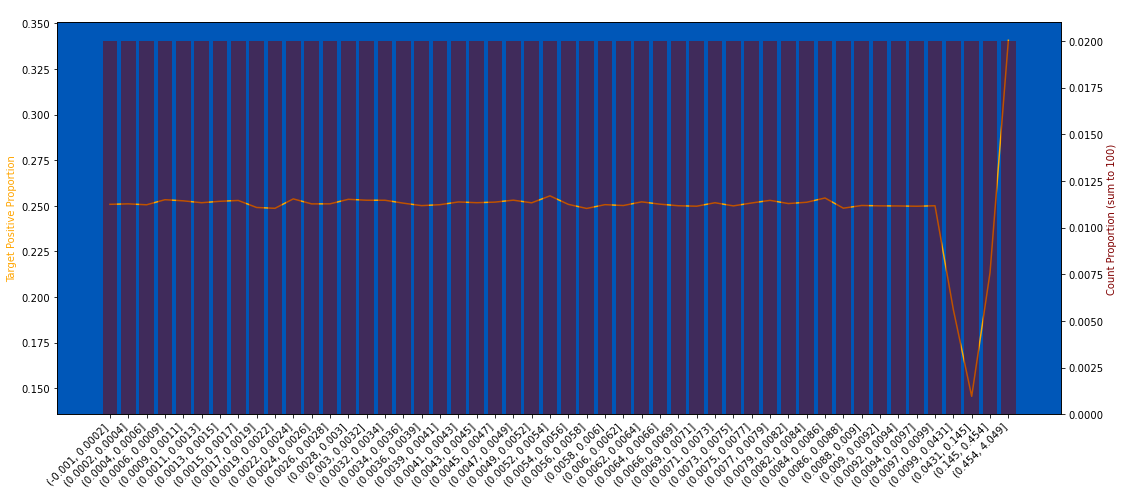

In [105]:
plot_target_check(train, "S_17", q=50, use_raw_bin=True)

In [106]:
%%time
df_list = round_dfs(df_list, col="S_17", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 235 ms, sys: 960 ms, total: 1.2 s
Wall time: 2.12 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


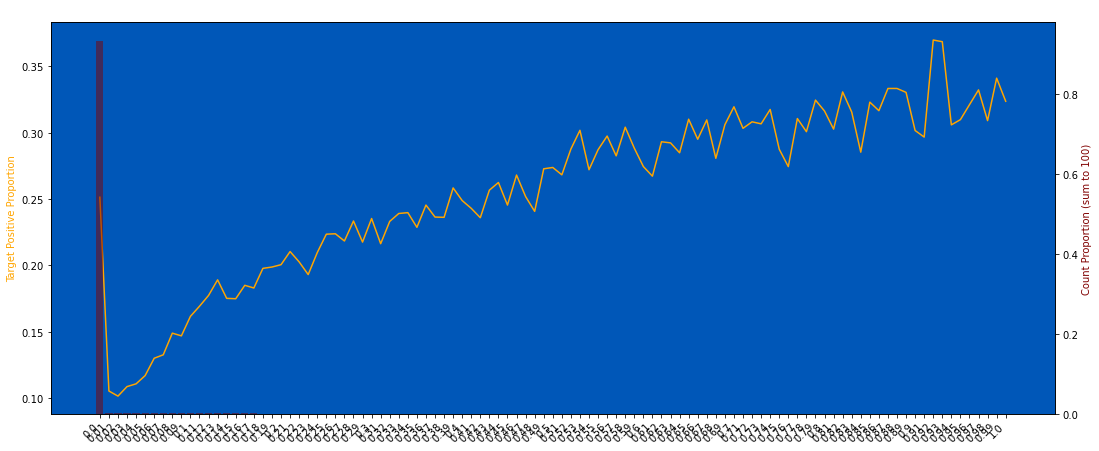

In [107]:
plot_target_check(train, "S_17", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [108]:
df_list = fill_nans(df_list, col="S_17", method="point", tuple_of_values=(0, 0.01), add_new_col=False)

5165422 null count, 0.934 null proportion
0.2511 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


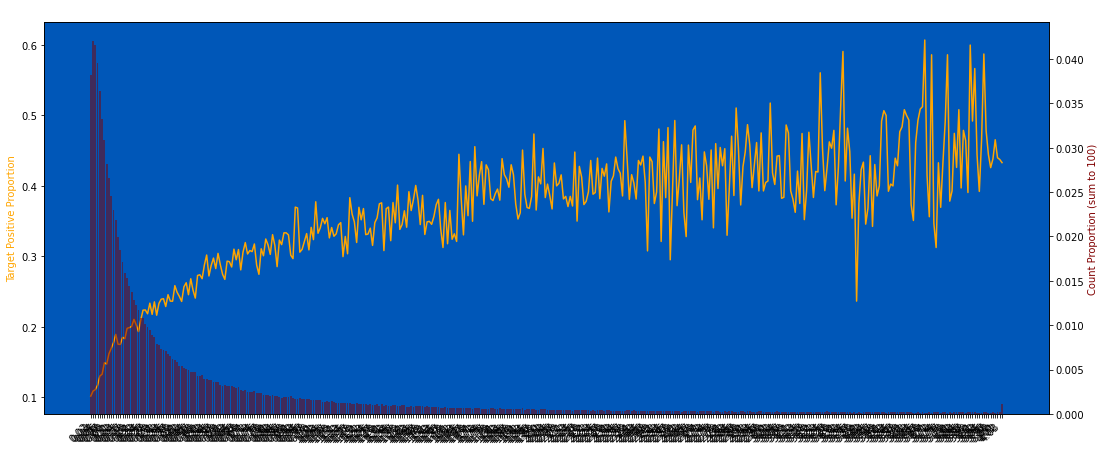

In [109]:
s17_summary = plot_target_check(train, "S_17", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True, return_df=True)

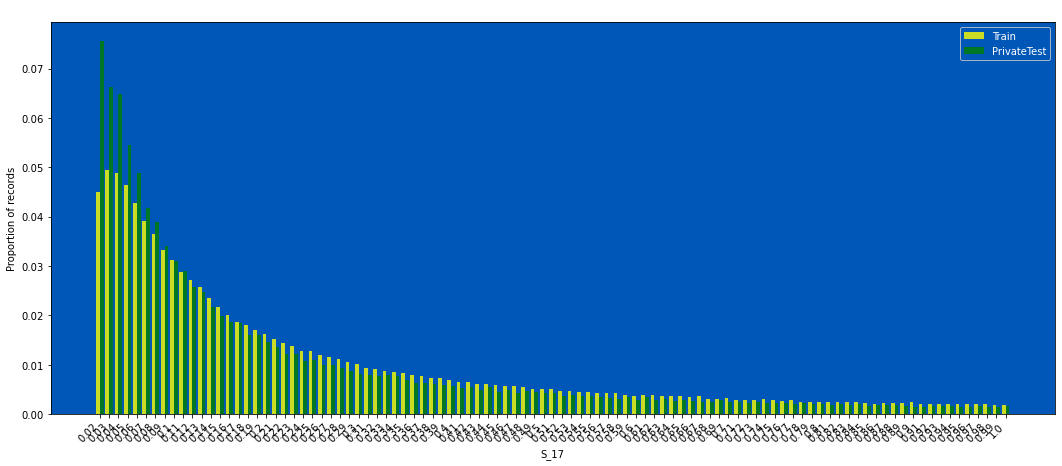

In [110]:
plot_train_test_distribution(
    [train.loc[train["S_17"] <= 1], 
    private_test.loc[private_test["S_17"] <= 1]],
    "S_17", 
    nunique_thr=15000,
    without_drop_tail=True
)

**Train Test Skew: Heavy**

### S_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


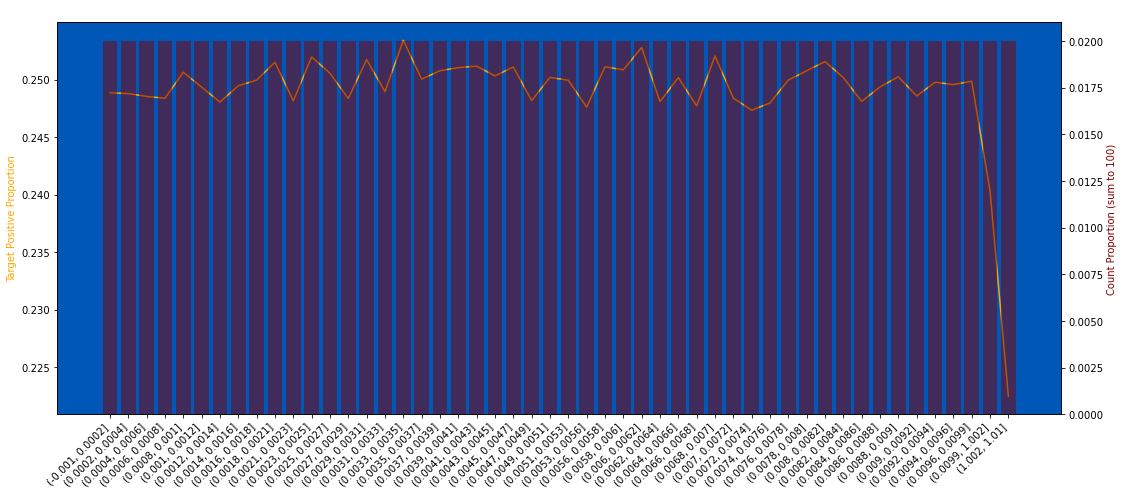

In [111]:
plot_target_check(train, "S_18", q=50, use_raw_bin=True)

In [112]:
%%time
df_list = round_dfs(df_list, col="S_18", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 232 ms, sys: 961 ms, total: 1.19 s
Wall time: 2.12 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


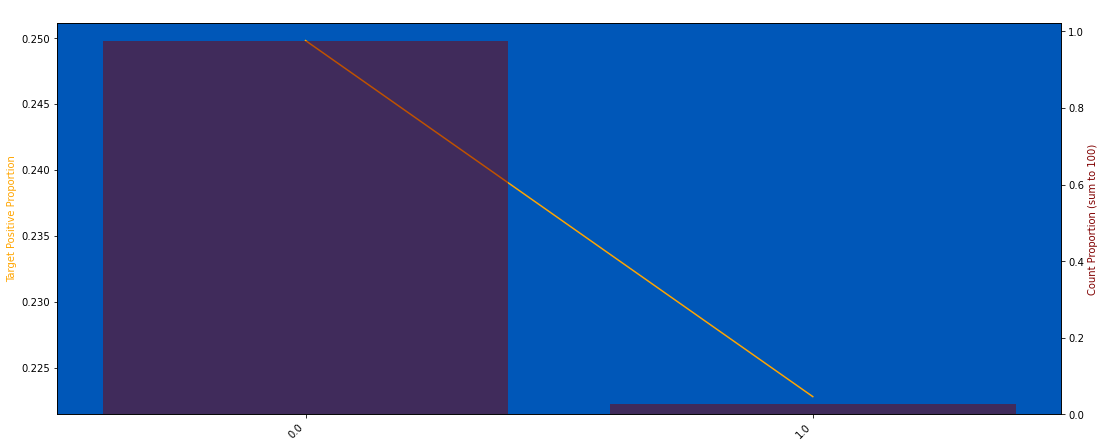

In [113]:
plot_target_check(train, "S_18", q=50, use_raw_bin=True, nunique_thr=5, strfy_x=True, without_drop_tail=True)

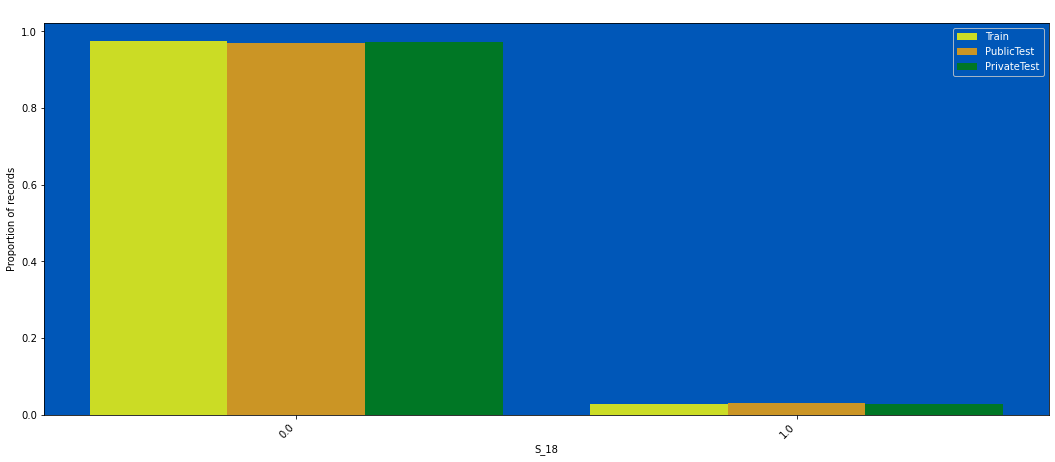

In [114]:
plot_train_test_distribution(df_list, "S_18", nunique_thr=150, without_drop_tail=True)

### S_19

0 null count, 0.000 null proportion
nan of the targets have label = 1


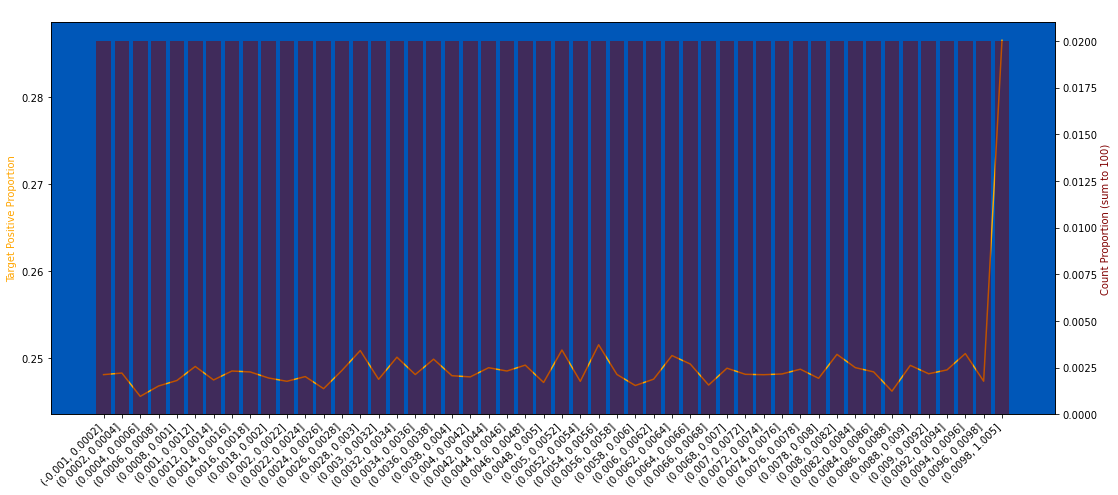

In [115]:
plot_target_check(train, "S_19", q=50, use_raw_bin=True)

In [116]:
%%time
df_list = round_dfs(df_list, col="S_19", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 265 ms, sys: 1.01 s, total: 1.28 s
Wall time: 2.22 s


In [117]:
for df in df_list:
    print(df["S_19"].mean())

2.7790176573923133e-05
2.6741993006693942e-05
2.6708393770487004e-05


In [118]:
%%time
for df in df_list:
    df = df.drop(columns=["S_19"], errors="ignore")

CPU times: user 695 ms, sys: 1.12 s, total: 1.82 s
Wall time: 1.99 s


### S_20

0 null count, 0.000 null proportion
nan of the targets have label = 1


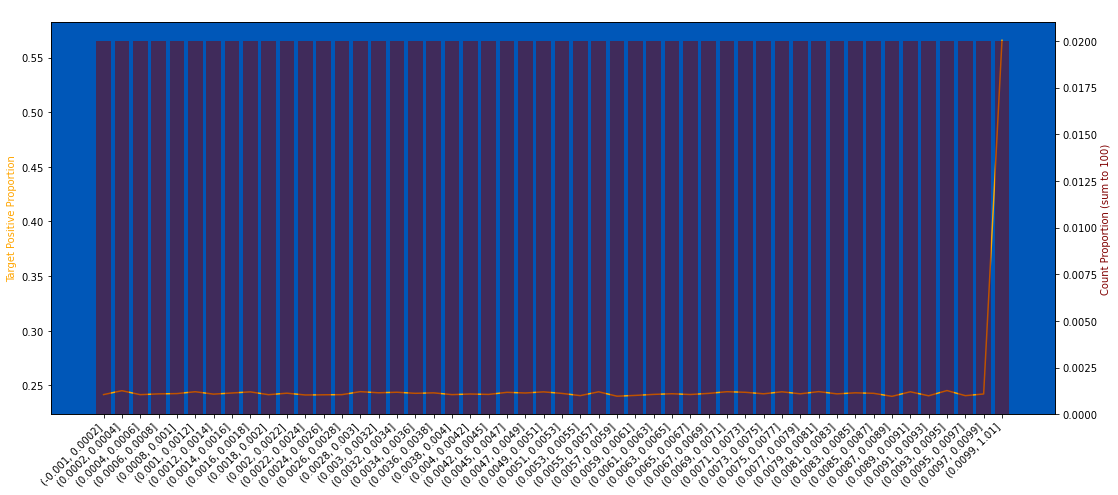

In [119]:
plot_target_check(train, "S_20", q=50, use_raw_bin=True, nunique_thr=200)

In [120]:
%%time
df_list = round_dfs(df_list, col="S_20", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 227 ms, sys: 1.13 s, total: 1.36 s
Wall time: 2.43 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


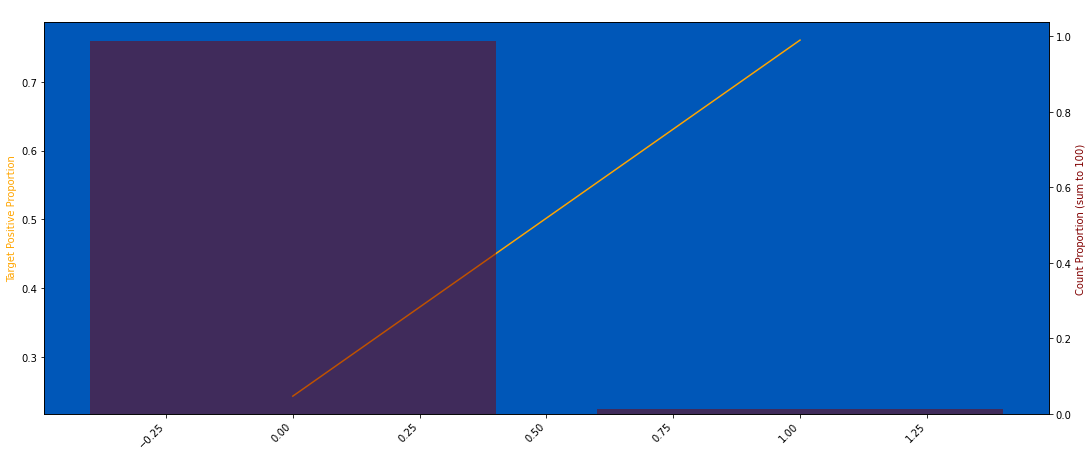

In [121]:
plot_target_check(train, "S_20", q=50, use_raw_bin=True, nunique_thr=2000, without_drop_tail=True)

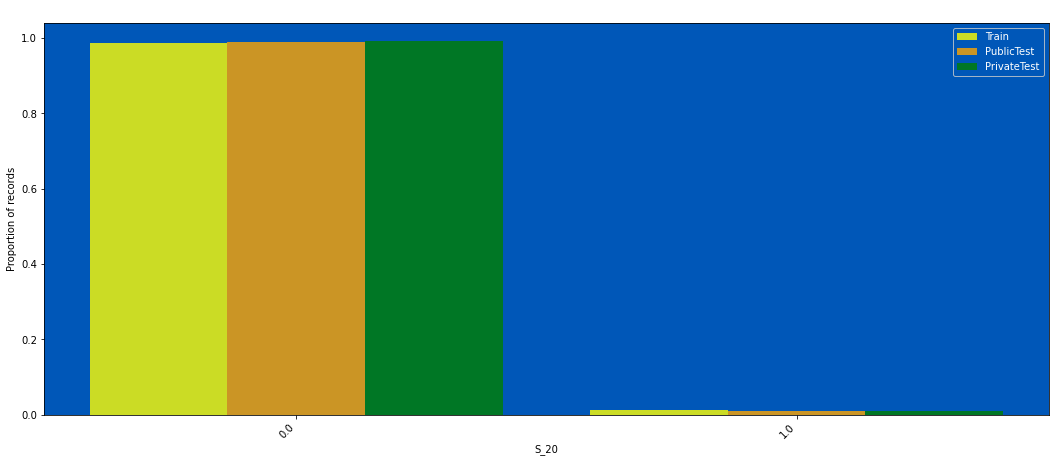

In [122]:
plot_train_test_distribution(df_list, "S_20", nunique_thr=50, without_drop_tail=True)

### S_22

19024 null count, 0.003 null proportion
0.1320 of the targets have label = 1


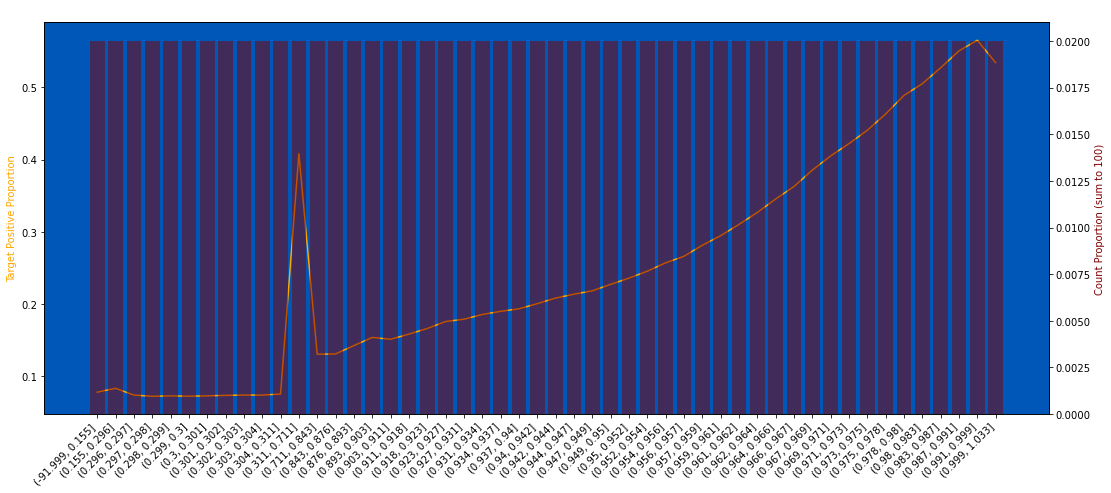

In [123]:
plot_target_check(train, "S_22", q=50, use_raw_bin=True)

In [124]:
%%time
df_list = round_dfs(df_list, col="S_22", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 233 ms, sys: 982 ms, total: 1.21 s
Wall time: 2.14 s


19024 null count, 0.003 null proportion
0.1320 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


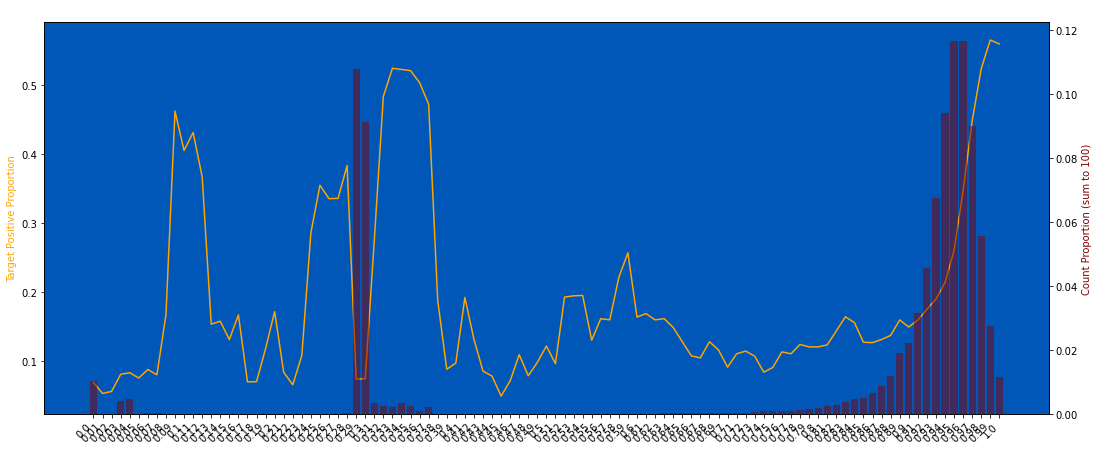

In [125]:
plot_target_check(train, "S_22", q=50, use_raw_bin=True, nunique_thr=777, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


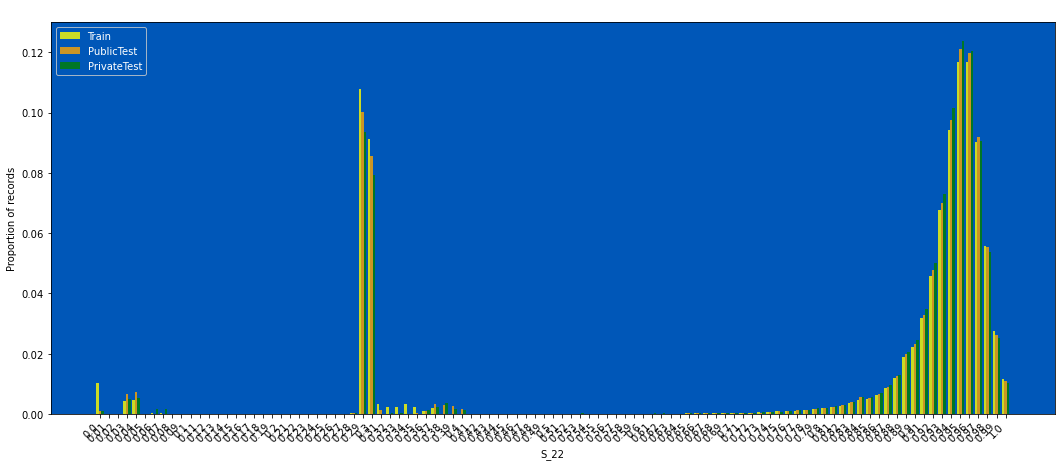

In [126]:
plot_train_test_distribution(df_list, "S_22", nunique_thr=777)

**Comments:**
- **Train Test Skew: Moderate**
- Relationship is ambigious

### S_23

445 null count, 0.000 null proportion
0.5236 of the targets have label = 1


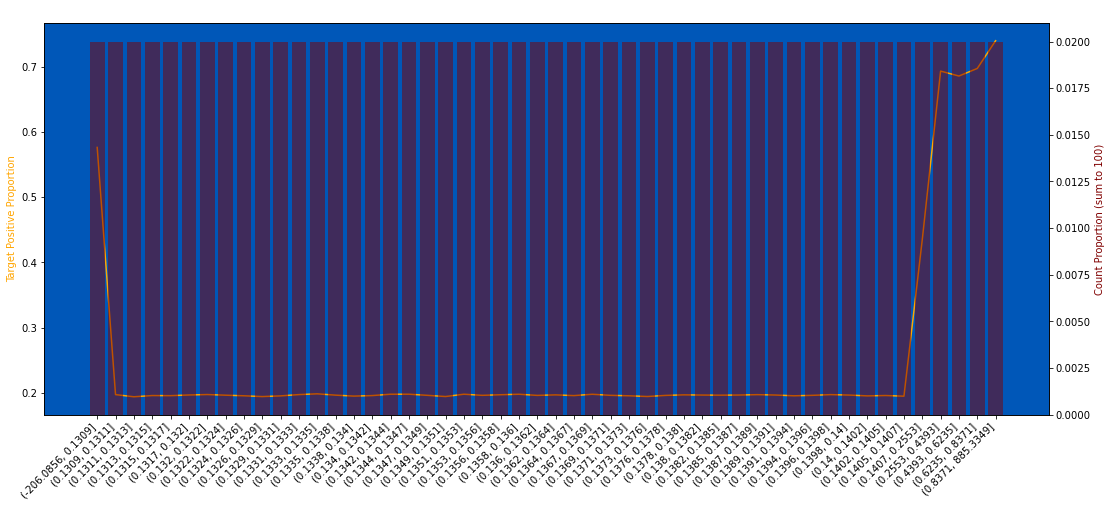

In [127]:
plot_target_check(train, "S_23", q=50, use_raw_bin=True)

In [128]:
%%time
df_list = round_dfs(df_list, col="S_23", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 248 ms, sys: 1.03 s, total: 1.28 s
Wall time: 2.22 s


445 null count, 0.000 null proportion
0.5236 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


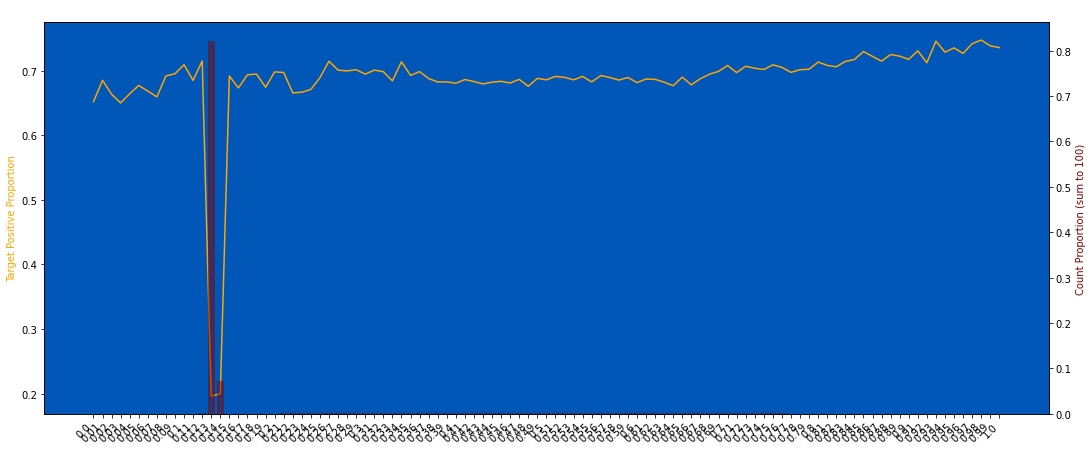

In [129]:
plot_target_check(train, "S_23", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1600)

**ToDo:**
- Identify the subset of 0.13 & 0.14 to be replace by NaN

Bottom 1% and Top 1% are dropped from this chart


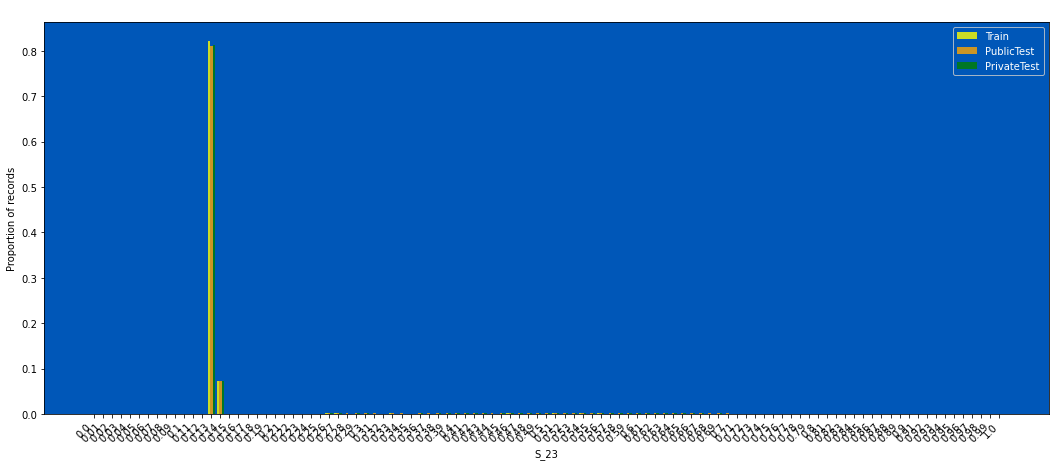

In [130]:
plot_train_test_distribution(df_list, "S_23", nunique_thr=1600)

### S_24

18593 null count, 0.003 null proportion
0.1317 of the targets have label = 1


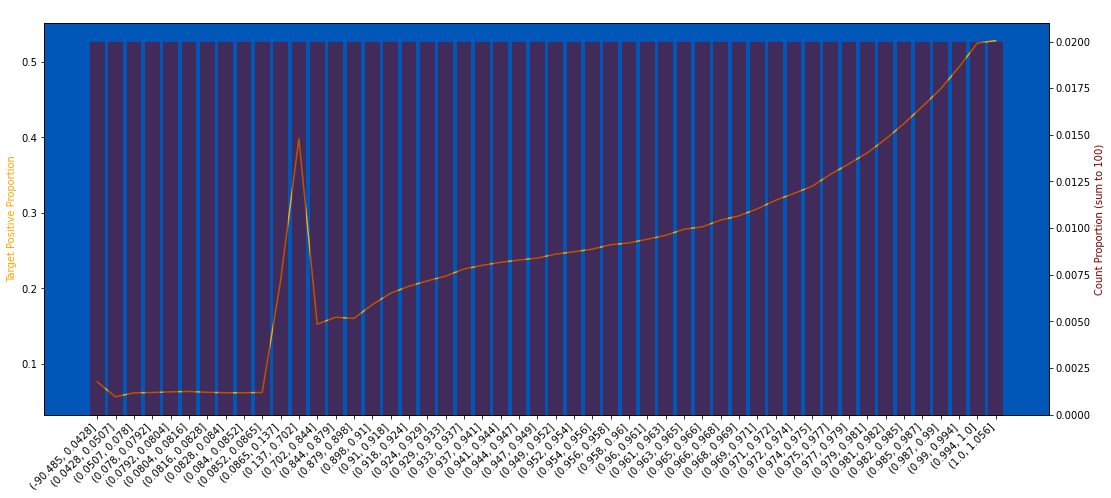

In [131]:
plot_target_check(train, "S_24", q=50, use_raw_bin=True)

In [132]:
%%time
df_list = round_dfs(df_list, col="S_24", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 247 ms, sys: 984 ms, total: 1.23 s
Wall time: 2.16 s


18593 null count, 0.003 null proportion
0.1317 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


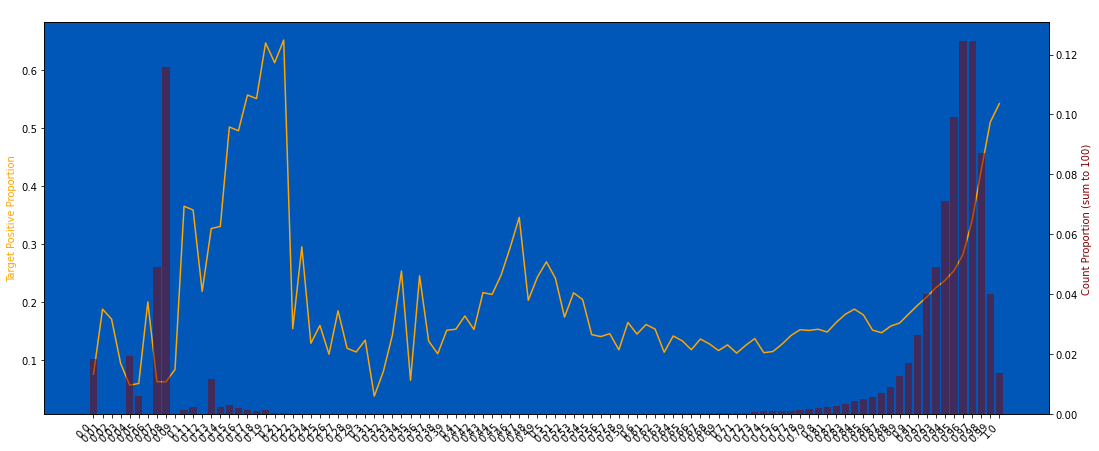

In [133]:
plot_target_check(train, "S_24", q=50, use_raw_bin=True, nunique_thr=650, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


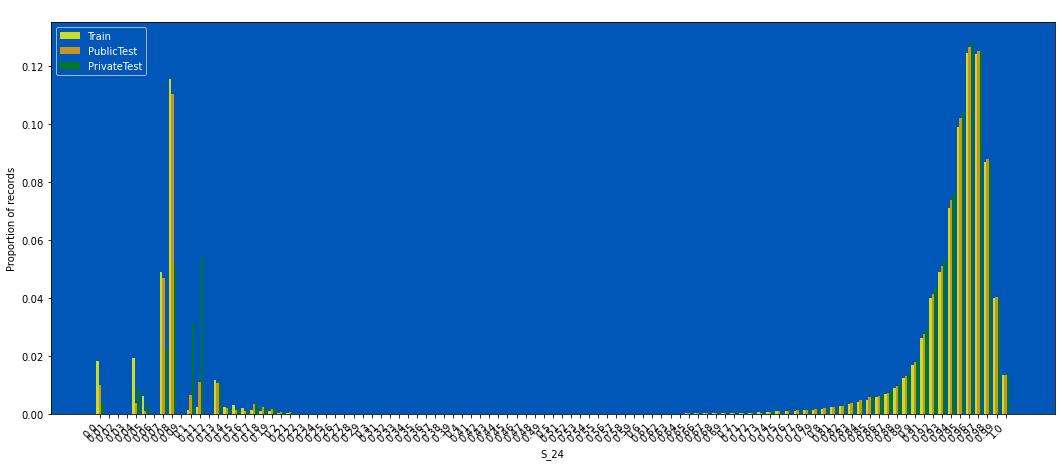

In [134]:
plot_train_test_distribution(df_list, "S_24", nunique_thr=650)

**Train Test Skew: Heavy**

### S_25

12847 null count, 0.002 null proportion
0.6575 of the targets have label = 1


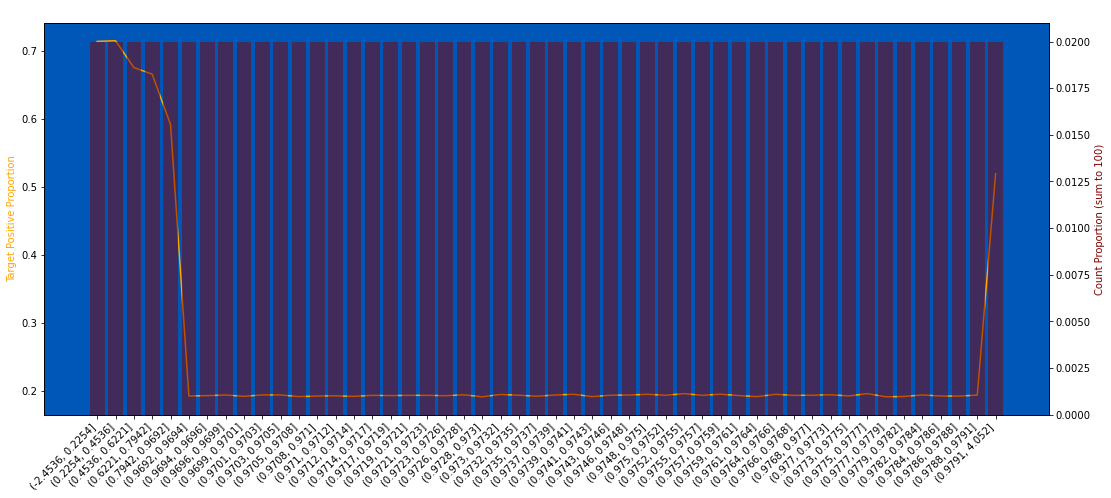

In [135]:
plot_target_check(train, "S_25", q=50, use_raw_bin=True)

In [136]:
%%time
df_list = round_dfs(df_list, col="S_25", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 250 ms, sys: 1 s, total: 1.25 s
Wall time: 2.21 s


12847 null count, 0.002 null proportion
0.6575 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


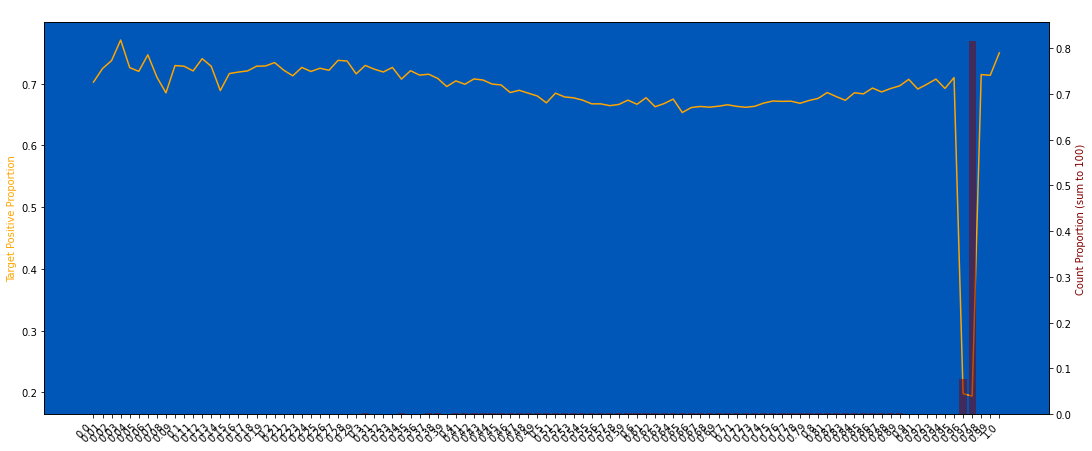

In [137]:
plot_target_check(train, "S_25", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


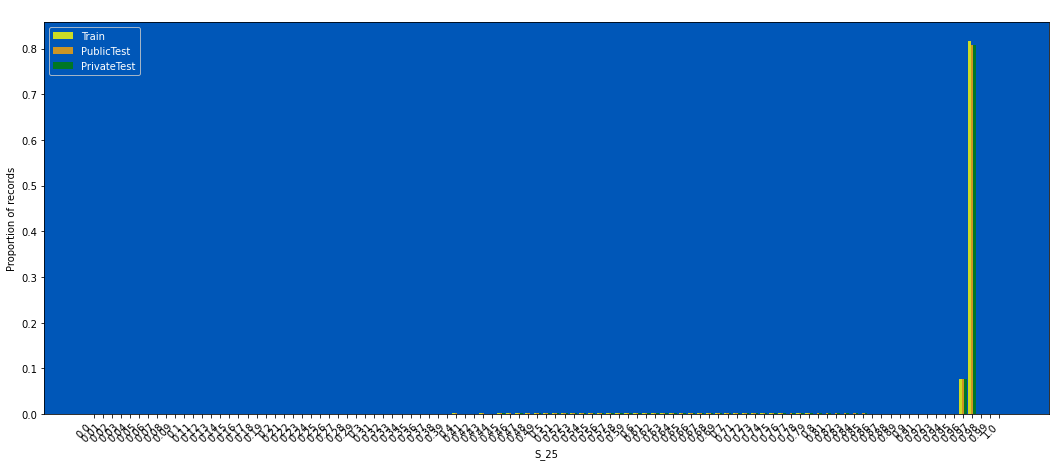

In [138]:
plot_train_test_distribution(df_list, "S_25", nunique_thr=1500)

**Train Test Skew: Moderate**

**ToDo:**
- Identify the subset of 0.97 & 0.98 to be replace by NaN

### S_26

634 null count, 0.000 null proportion
0.1325 of the targets have label = 1


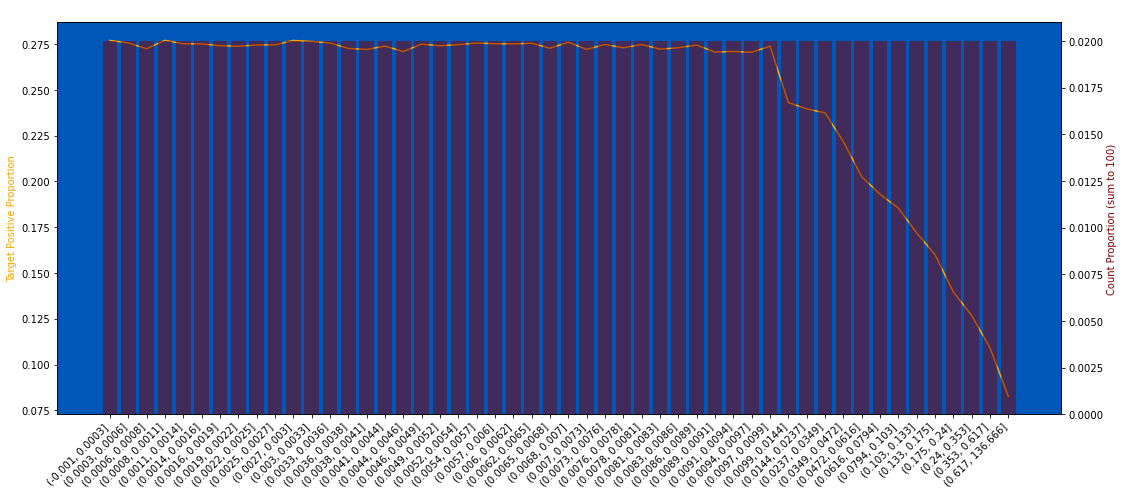

In [139]:
plot_target_check(train, "S_26", q=50, use_raw_bin=True)

In [140]:
%%time
df_list = round_dfs(df_list, col="S_26", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 250 ms, sys: 968 ms, total: 1.22 s
Wall time: 2.16 s


634 null count, 0.000 null proportion
0.1325 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


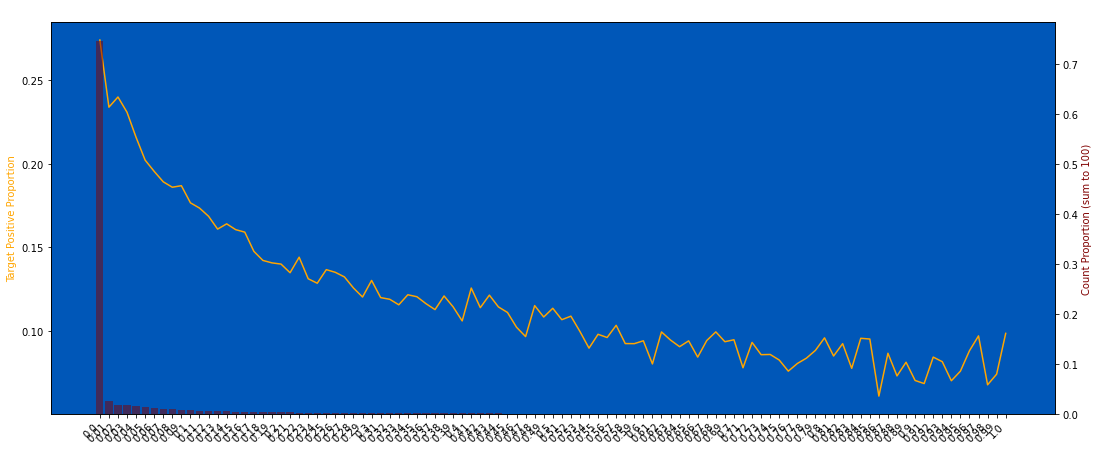

In [141]:
plot_target_check(train, "S_26", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

In [142]:
# for df in df_list:
#     df["S_26"] = df["S_26"].parallel_apply(lambda x: manual_stack(x, start=0.01, stack_interval=0.05, denom=100))

634 null count, 0.000 null proportion
0.1325 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


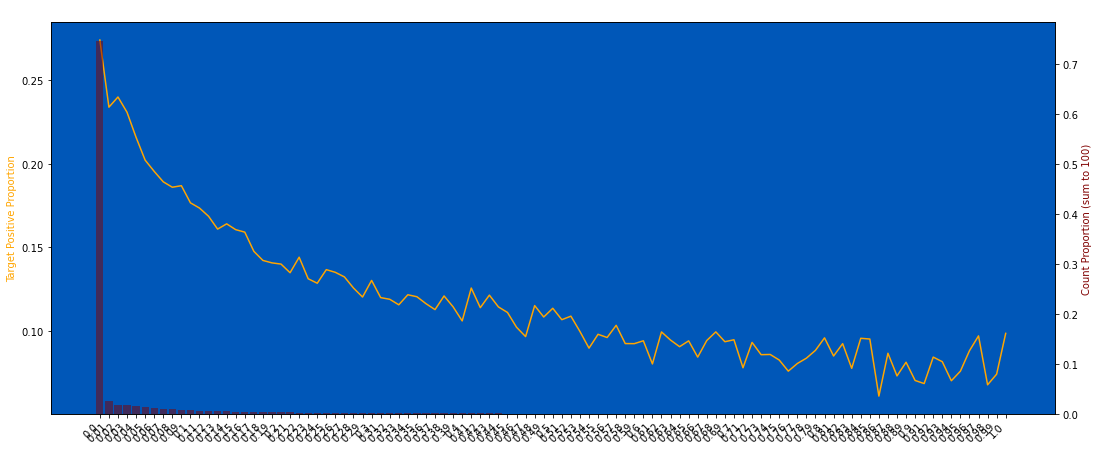

In [143]:
plot_target_check(train, "S_26", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


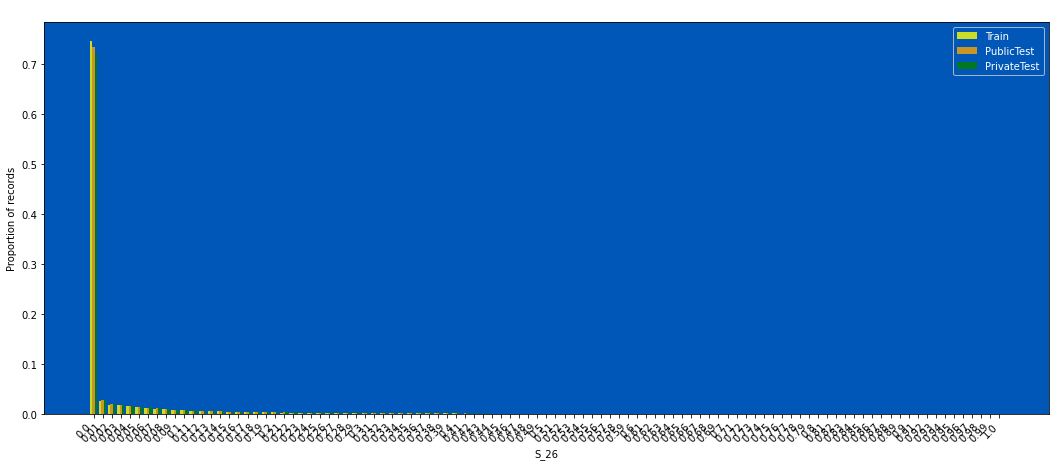

In [144]:
plot_train_test_distribution(df_list, "S_26", nunique_thr=2000)

### S_27

1400935 null count, 0.253 null proportion
0.1697 of the targets have label = 1


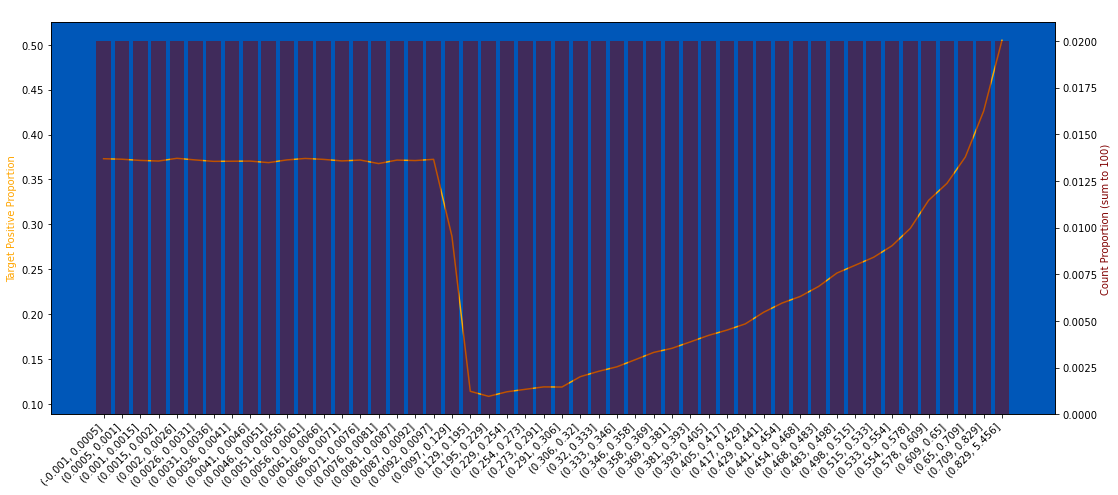

In [145]:
plot_target_check(train, "S_27", q=50, use_raw_bin=True)

In [146]:
%%time
df_list = round_dfs(df_list, col="S_27", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 248 ms, sys: 1 s, total: 1.25 s
Wall time: 2.25 s


1400935 null count, 0.253 null proportion
0.1697 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


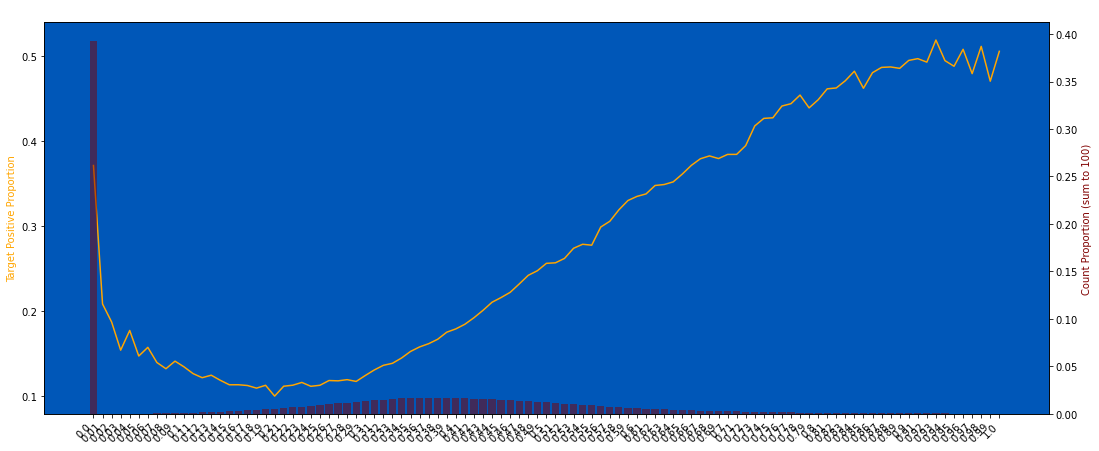

In [147]:
plot_target_check(train, "S_27", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True)

**ToDo:**
- Impute, then set 0 & 0.01 as NaN??

Bottom 1% and Top 1% are dropped from this chart


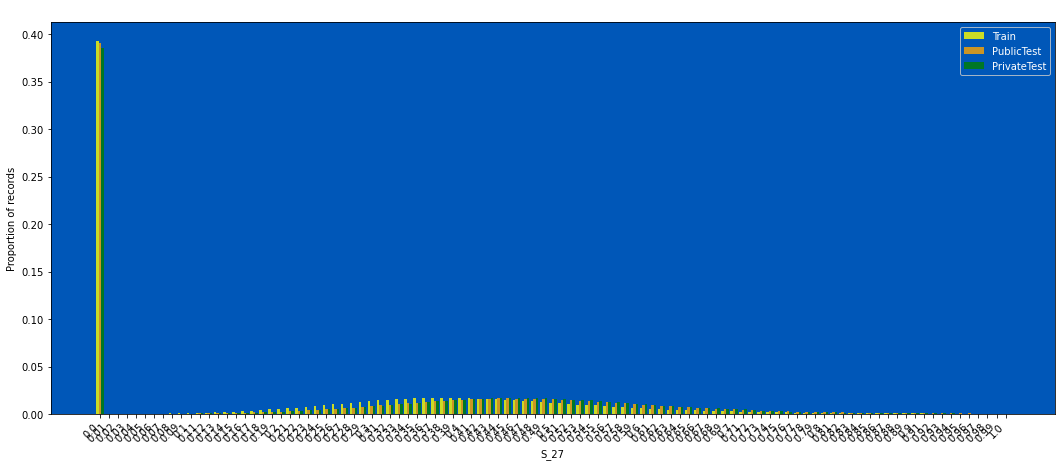

In [148]:
plot_train_test_distribution(df_list, "S_27", nunique_thr=1500)

**Train Test Skew: Heavy**

### Column checking

In [149]:
from tqdm import tqdm

In [150]:
no_use_features = ["temp"] + df_list[0].columns[df_list[0].columns.str.endswith("_")].tolist()
no_use_features

['temp', 'S_11_', 'S_13_', 'S_15_']

In [151]:
%%time
for df in tqdm(df_list):
    df.drop(columns=no_use_features, errors="ignore", inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.12it/s]

CPU times: user 568 ms, sys: 833 ms, total: 1.4 s
Wall time: 1.43 s


In [152]:
all_columns = get_cols(df_list[0], ("S_", "P_"))
print(all_columns)

['S_2', 'P_2', 'S_3', 'P_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'P_4', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']


In [153]:
d_col_nunique = df_list[0][all_columns].nunique()
less_unique_d_cols = d_col_nunique[d_col_nunique < 99].index.tolist()
for d in less_unique_d_cols:
    if df_list[0][d].dtype != np.int32:
        print(d, ":", df_list[0][d].dtype, "\n", sorted(df_list[0][d].unique().tolist()), "\n")

S_8 : float64 
 [0.1, 0.11, 0.12, 0.16, 0.17, 0.24, 0.25, 0.31, 0.32, 0.33, 0.35, 0.36, 0.4, 0.41, 0.45, 0.46, 0.47, 0.48, 0.49, 0.59, 0.6, 0.61, 0.66, 0.67, 0.7, 0.71, 0.74, 0.75, 0.76, 0.85, 0.86, 0.91, 0.92, 0.94, 1.0, nan, 0.93, 1.01, 1.02, 1.1, 1.11, 1.14, 1.15, 1.16, 1.22, 1.23] 

S_11 : float64 
 [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 95.0] 

S_13 : int64 
 [0, 5, 8, 10, 11, 12, 13, 16, 17, 20] 

S_15 : float64 
 [-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, nan, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1

In [154]:
cols = list(
    set(less_unique_d_cols) - set(["S_8", "S_15", "P_4", "S_19"])
)

In [155]:
for col in tqdm(cols):
    for df in df_list:
        df[col] = integerize(df[col])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.70it/s]


In [156]:
%%time
train = df_list[0]
test = pd.concat(df_list[1:], axis=0)
test = test.sort_values(by=["customer_ID", "S_2"]).reset_index(drop=True)

CPU times: user 3.91 s, sys: 3.65 s, total: 7.56 s
Wall time: 10.2 s


In [157]:
train.shape, test.shape

((5531451, 27), (11363762, 26))

In [158]:
float64_columns = train.select_dtypes("float64").columns.tolist()
for col in float64_columns:
    temp = df_list[-1][col].astype(np.float32).values
    if (temp - df_list[-1][col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to float32")
        for df in df_list:
            df[col] = df[col].astype(np.float32)

P_2 fulfill criteria to convert to float32
S_3 fulfill criteria to convert to float32
P_3 fulfill criteria to convert to float32
S_5 fulfill criteria to convert to float32
S_7 fulfill criteria to convert to float32
S_8 fulfill criteria to convert to float32
S_9 fulfill criteria to convert to float32
S_12 fulfill criteria to convert to float32
S_15 fulfill criteria to convert to float32
P_4 fulfill criteria to convert to float32
S_16 fulfill criteria to convert to float32
S_17 fulfill criteria to convert to float32
S_19 fulfill criteria to convert to float32
S_22 fulfill criteria to convert to float32
S_23 fulfill criteria to convert to float32
S_24 fulfill criteria to convert to float32
S_25 fulfill criteria to convert to float32
S_26 fulfill criteria to convert to float32
S_27 fulfill criteria to convert to float32


In [159]:
for d in tqdm(all_columns):
    for df in df_list:
        df[d] = df[d].fillna(-127)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:15<00:00,  1.60it/s]


In [160]:
%%time
train.to_parquet(f"{INTERIM_TRAIN_PARQUET_PATH}/spend_payment.parquet")
test.to_parquet(f"{INTERIM_TEST_PARQUET_PATH}/spend_payment.parquet")

CPU times: user 8.1 s, sys: 797 ms, total: 8.9 s
Wall time: 7.89 s


In [161]:
test.shape

(11363762, 26)

In [162]:
END = time.time()

In [163]:
print(f"{END - START:.2f} seconds elapsed")

218.26 seconds elapsed


In [164]:
t = read_file(f"{INTERIM_TRAIN_PARQUET_PATH}/spend_payment.parquet", replace_negative127=False)

Shape of data: (5531451, 27)


In [165]:
t.head()

,customer_ID,S_2,P_2,S_3,P_3,S_5,S_6,S_7,S_8,S_9,...,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.9300,0.1200,0.7300,0.0200,0,0.1600,0.9200,0.0600,...,0,0.0000,0,0.8900,0.1300,0.9100,0.9700,0.0000,0.6700,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.9300,0.1200,0.7200,0.0300,0,0.1400,0.9100,0.0900,...,0,0.0000,0,0.9000,0.1300,0.9100,0.9700,0.0000,0.8200,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.9500,0.1200,0.7300,0.0400,0,0.1100,1.0000,0.0800,...,0,0.0000,0,0.9300,0.1300,0.9500,0.9700,0.0100,0.8500,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.9600,0.1100,0.7400,0.0300,0,0.1000,0.7000,0.0400,...,0,0.0000,0,0.9100,0.1400,0.9200,0.9700,0.0000,0.8400,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.9400,0.1100,0.6900,0.0500,0,0.0900,0.9100,0.0300,...,0,0.0000,0,0.9200,0.1300,0.9300,0.9700,0.0100,0.8100,0
